## As the case study intends to figure out churned customers, the metric we intend to optimize the most Sensitivity/Recall, along with bringing up Precision and F1 score as much as possible by the model building. 
### Convention - if the value for a Dataframe entry in the column "churned" is 1, it is said to indicate that the respective party has churned

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime as dt
import warnings 
seed=100


from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
d = pd.read_csv("telecom_churn_data.csv")
d

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109             0.0             0.0   
1         7001865778        109             0.0             0.0   
2         7001625959        109             0.0             0.0   
3         7001204172        109             0.0             0.0   
4         7000142493        109             0.0             0.0   
...              ...        ...             ...             ...   
99994     7001548952        109             0.0             0.0   
99995     7000607688        109             0.0             0.0   
99996     7000087541        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   
99998     7001905007        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
0                 0.0            6/30/2014            7/31/2014   
1                 0.0            6/30/2014            7/31/2014   
2                 0.0            6/30/2014            7/31/2014   
3                 0.0            6/30/2014            7/31/2014   
4                 0.0            6/30/2014            7/31/2014   
...               ...                  ...                  ...   
99994             0.0            6/30/2014            7/31/2014   
99995             0.0            6/30/2014            7/31/2014   
99996             0.0            6/30/2014            7/31/2014   
99997             0.0            6/30/2014            7/31/2014   
99998             0.0            6/30/2014            7/31/2014   

      last_date_of_month_8 last_date_of_month_9   arpu_6  ...  sachet_3g_9  \
0                8/31/2014            9/30/2014  197.385  ...            0   
1                8/31/2014            9/30/2014   34.047  ...            0   
2                8/31/2014            9/30/2014  167.690  ...            0   
3                8/31/2014            9/30/2014  221.338  ...            0   
4                8/31/2014            9/30/2014  261.636  ...            0   
...                    ...                  ...      ...  ...          ...   
99994            8/31/2014            9/30/2014   18.471  ...            0   
99995            8/31/2014            9/30/2014  112.201  ...            0   
99996            8/31/2014            9/30/2014  229.187  ...            0   
99997            8/31/2014            9/30/2014  322.991  ...            0   
99998            8/31/2014            9/30/2014  687.065  ...            0   

       fb_user_6  fb_user_7  fb_user_8  fb_user_9   aon  aug_vbc_3g  \
0            1.0        1.0        1.0        NaN   968       30.40   
1            NaN        1.0        1.0        NaN  1006        0.00   
2            NaN        NaN        NaN        1.0  1103        0.00   
3            NaN        NaN        NaN        NaN  2491        0.00   
4            0.0        NaN        NaN        NaN  1526        0.00   
...          ...        ...        ...        ...   ...         ...   
99994        NaN        NaN        NaN        NaN  3199        0.00   
99995        NaN        NaN        NaN        NaN  2052        0.00   
99996        1.0        NaN        NaN        NaN   185        0.00   
99997        1.0        1.0        1.0        1.0   478     1445.74   
99998        1.0        NaN        NaN        NaN   751        0.00   

       jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0            0.00      101.20        3.58  
1            0.00        0.00        0.00  
2            0.00        4.17        0.00  
3            0.00        0.00        0.00  
4            0.00        0.00        0.00  
...           ...         ...         ...  
99994        0.00        0.00        0.00  
99995        0.00        0.00        0.00  
99996        0.00        0.00        0.00  
99997     1151.03     1173.18        0.00  
99998        0.00        0.00        0.00  

[99999 rows x 226 columns]

d_dict = pd.read_excel("Data_Dict.xlsx") 

(d_dict)

In [4]:
d.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

## Removing all the date columns

In [5]:
l = list(d.columns)
date_columns = []
for i in l:
    if "date" in i:
        date_columns.append(i)

In [6]:
d = d[list(set(l).difference(set(date_columns)))]

In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 214 entries, loc_ic_mou_9 to onnet_mou_7
dtypes: float64(179), int64(35)
memory usage: 163.3 MB


In [8]:
data_columns = []
for i in d.columns:
    if "data" in i or "2g" in i or "3g" in i:
        data_columns.append(i)


In [9]:
data_6 = []
data_7 = []
for i in data_columns:
    if "_6" in i:
        data_6.append(i)
    if "_7" in i:
        data_7.append(i)


#### All the data necessary for figuring out the number of data recharges done in 6 and 7 months is available as monthly_xg_y and sachet_xg_y columns. 

In [10]:
packs = []
for i in data_columns:
    if "monthly" in i or "sachet" in i:
        packs.append(i)

d[packs].isnull().sum()

sachet_3g_8     0
sachet_2g_6     0
sachet_2g_8     0
sachet_3g_6     0
monthly_3g_7    0
monthly_2g_7    0
sachet_2g_9     0
monthly_3g_6    0
sachet_3g_9     0
sachet_3g_7     0
sachet_2g_7     0
monthly_2g_9    0
monthly_2g_8    0
monthly_2g_6    0
monthly_3g_8    0
monthly_3g_9    0
dtype: int64

In [11]:
av_rech_amt_data = []
for i in d.columns:
    if "av_rech_amt" in i:
        av_rech_amt_data.append(i)
d[av_rech_amt_data].isnull().sum()

av_rech_amt_data_8    73660
av_rech_amt_data_7    74428
av_rech_amt_data_6    74846
av_rech_amt_data_9    74077
dtype: int64

In [12]:
import math

## Imputing the values into total_rech_data_x_new as the sum of all data subscriptions done on that particular month

In [13]:
cols6 = ['total_rech_data_6',"monthly_2g_6","monthly_3g_6","sachet_2g_6","sachet_3g_6"]
cols7 = ['total_rech_data_7',"monthly_2g_7","monthly_3g_7","sachet_2g_7","sachet_3g_7"]
cols8 = ['total_rech_data_8',"monthly_2g_8","monthly_3g_8","sachet_2g_8","sachet_3g_8"]
adder = lambda x: x[1]+x[2]+x[3]+x[4] if math.isnan(x[0]) else x[0] 

d["total_rech_data_6_new"] = d[cols6].apply( adder,axis=1)
d["total_rech_data_6_new"]  
d["total_rech_data_7_new"] = d[cols7].apply( adder,axis=1)
d["total_rech_data_7_new"] 
d["total_rech_data_8_new"] = d[cols8].apply( adder,axis=1)
d["total_rech_data_8_new"] 

0        1.0
1        2.0
2        0.0
3        0.0
4        0.0
        ... 
99994    0.0
99995    0.0
99996    0.0
99997    4.0
99998    0.0
Name: total_rech_data_8_new, Length: 99999, dtype: float64

In [14]:

cols6 = ["total_rech_data_6_new","av_rech_amt_data_6"]
cols7 = ["total_rech_data_7_new","av_rech_amt_data_7"]
cols8 = ["total_rech_data_8_new","av_rech_amt_data_8"]

d["av_rech_amt_data_6"] = d[cols6].apply(lambda x: 0 if x[0]==0.0 else x[1] , axis=1)
d["av_rech_amt_data_7"] = d[cols7].apply(lambda x: 0 if x[0]==0.0 else x[1] , axis=1)
d["av_rech_amt_data_8"] = d[cols8].apply(lambda x: 0 if x[0]==0.0 else x[1] , axis=1)


In [15]:
d.isnull().sum()[["av_rech_amt_data_6","av_rech_amt_data_7","av_rech_amt_data_8"]]

av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
dtype: int64

## Calculating total amount of recharge for 6th and 7th month as total call value recharge + total data value recharge
> Deducing total data value recharge as the product of frequency of data recharges and average amount per recharge
> This is a necessary part of filtering out high value customers

In [16]:
cols6 = ["av_rech_amt_data_6","total_rech_data_6_new", "total_rech_amt_6" ]

d["total_amt_6"] = d[cols6].apply(lambda x : x[0]*x[1]+x[2], axis=1)
d["total_amt_6"]

0         614.0
1          74.0
2         168.0
3         230.0
4         252.0
          ...  
99994      60.0
99995     110.0
99996     197.0
99997    2130.0
99998     864.0
Name: total_amt_6, Length: 99999, dtype: float64

In [17]:
cols7 = ["av_rech_amt_data_7","total_rech_data_7_new", "total_rech_amt_7" ]

d["total_amt_7"] = d[cols7].apply(lambda x : x[0]*x[1]+x[2], axis=1)
d["total_amt_7"]

0         504.0
1         538.0
2         315.0
3         310.0
4         350.0
          ...  
99994     110.0
99995     110.0
99996       0.0
99997    1074.0
99998       0.0
Name: total_amt_7, Length: 99999, dtype: float64

#### Average total amount spent by customers in good phase

In [18]:
d["avg_total_amt_good"] = (d["total_amt_6"]+d["total_amt_7"])/2
d["avg_total_amt_good"]

0         559.0
1         306.0
2         241.5
3         270.0
4         301.0
          ...  
99994      85.0
99995     110.0
99996      98.5
99997    1602.0
99998     432.0
Name: avg_total_amt_good, Length: 99999, dtype: float64

In [19]:
d["avg_total_amt_good"].isnull().sum()

0

### Taking high value customers as the ones above 70th quantile

In [20]:
quantile_70 = d["avg_total_amt_good"].quantile( q=.7 ) 

quantile_70  

478.0

In [21]:

d["high_value"] = d["avg_total_amt_good"].apply(lambda x: 1 if x>=quantile_70 else 0)
d["high_value"]


0        1
1        0
2        0
3        0
4        0
        ..
99994    0
99995    0
99996    0
99997    1
99998    0
Name: high_value, Length: 99999, dtype: int64

In [22]:
d = d[d["high_value"]==1]
d

loc_ic_mou_9  jun_vbc_3g  av_rech_amt_data_8  arpu_3g_8  \
0               NaN      101.20               252.0     212.17   
7               NaN       18.74                 0.0        NaN   
8             21.38      122.16                69.0      19.83   
21           139.88        0.00                 0.0        NaN   
23           121.19        0.00               270.0     197.27   
...             ...         ...                 ...        ...   
99981        348.44      668.05               252.0     212.20   
99984        149.26        0.00               117.0       0.00   
99986        542.48      604.08                25.0       0.05   
99988        261.78        0.00               154.0       5.44   
99997          2.21     1173.18               716.0     602.68   

       std_og_t2c_mou_9  sachet_3g_8  last_day_rch_amt_6  std_og_t2m_mou_6  \
0                   NaN            0                 252               NaN   
7                   NaN            0                   0             49.89   
8                   0.0            0                  50             13.69   
21                  0.0            0                  30            665.36   
23                  0.0            1                   0              2.36   
...                 ...          ...                 ...               ...   
99981               0.0            0                 252              0.00   
99984               0.0            0                   0              0.03   
99986               0.0            0                 550            186.88   
99988               0.0            0                  50             38.04   
99997               0.0            0                 202              0.00   

       sachet_2g_6  circle_id  ...  std_ic_t2o_mou_6  std_ic_t2f_mou_6  \
0                0        109  ...               NaN               NaN   
7                0        109  ...               0.0             52.19   
8                0        109  ...               0.0              0.00   
21               0        109  ...               0.0              0.00   
23               0        109  ...               0.0              0.00   
...            ...        ...  ...               ...               ...   
99981            0        109  ...               0.0             41.59   
99984            0        109  ...               0.0              0.99   
99986            1        109  ...               0.0              0.00   
99988            0        109  ...               0.0              1.01   
99997            1        109  ...               0.0              0.00   

       onnet_mou_7  total_rech_data_6_new  total_rech_data_7_new  \
0              NaN                    1.0                    1.0   
7            54.68                    0.0                    0.0   
8           351.03                    0.0                    2.0   
21          132.11                    0.0                    0.0   
23           50.66                    0.0                    2.0   
...            ...                    ...                    ...   
99981        29.04                    1.0                    1.0   
99984       181.83                    1.0                    4.0   
99986       549.36                    1.0                    1.0   
99988       174.46                    0.0                    1.0   
99997         0.00                    3.0                    2.0   

       total_rech_data_8_new  total_amt_6  total_amt_7  avg_total_amt_good  \
0                        1.0        614.0        504.0               559.0   
7                        0.0       1580.0        790.0              1185.0   
8                        3.0        437.0        955.0               696.0   
21                       0.0        600.0        680.0               640.0   
23                       2.0          0.0       1166.0               583.0   
...                      ...          ...          ...                 ...   
99981                    

In [23]:
quantile_999 = d["avg_total_amt_good"].quantile( q=.999) 
quantile_999

17408.500000004056

### Outlier elimination

In [24]:
d=d[ d["avg_total_amt_good"] < quantile_999]
d

loc_ic_mou_9  jun_vbc_3g  av_rech_amt_data_8  arpu_3g_8  \
0               NaN      101.20               252.0     212.17   
7               NaN       18.74                 0.0        NaN   
8             21.38      122.16                69.0      19.83   
21           139.88        0.00                 0.0        NaN   
23           121.19        0.00               270.0     197.27   
...             ...         ...                 ...        ...   
99981        348.44      668.05               252.0     212.20   
99984        149.26        0.00               117.0       0.00   
99986        542.48      604.08                25.0       0.05   
99988        261.78        0.00               154.0       5.44   
99997          2.21     1173.18               716.0     602.68   

       std_og_t2c_mou_9  sachet_3g_8  last_day_rch_amt_6  std_og_t2m_mou_6  \
0                   NaN            0                 252               NaN   
7                   NaN            0                   0             49.89   
8                   0.0            0                  50             13.69   
21                  0.0            0                  30            665.36   
23                  0.0            1                   0              2.36   
...                 ...          ...                 ...               ...   
99981               0.0            0                 252              0.00   
99984               0.0            0                   0              0.03   
99986               0.0            0                 550            186.88   
99988               0.0            0                  50             38.04   
99997               0.0            0                 202              0.00   

       sachet_2g_6  circle_id  ...  std_ic_t2o_mou_6  std_ic_t2f_mou_6  \
0                0        109  ...               NaN               NaN   
7                0        109  ...               0.0             52.19   
8                0        109  ...               0.0              0.00   
21               0        109  ...               0.0              0.00   
23               0        109  ...               0.0              0.00   
...            ...        ...  ...               ...               ...   
99981            0        109  ...               0.0             41.59   
99984            0        109  ...               0.0              0.99   
99986            1        109  ...               0.0              0.00   
99988            0        109  ...               0.0              1.01   
99997            1        109  ...               0.0              0.00   

       onnet_mou_7  total_rech_data_6_new  total_rech_data_7_new  \
0              NaN                    1.0                    1.0   
7            54.68                    0.0                    0.0   
8           351.03                    0.0                    2.0   
21          132.11                    0.0                    0.0   
23           50.66                    0.0                    2.0   
...            ...                    ...                    ...   
99981        29.04                    1.0                    1.0   
99984       181.83                    1.0                    4.0   
99986       549.36                    1.0                    1.0   
99988       174.46                    0.0                    1.0   
99997         0.00                    3.0                    2.0   

       total_rech_data_8_new  total_amt_6  total_amt_7  avg_total_amt_good  \
0                        1.0        614.0        504.0               559.0   
7                        0.0       1580.0        790.0              1185.0   
8                        3.0        437.0        955.0               696.0   
21                       0.0        600.0        680.0               640.0   
23                       2.0          0.0       1166.0               583.0   
...                      ...          ...          ...                 ...   
99981                    

In [25]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29971 entries, 0 to 99997
Columns: 221 entries, loc_ic_mou_9 to high_value
dtypes: float64(185), int64(36)
memory usage: 50.8 MB


## Deducing churned customers as the ones with no usage in 9th month in Data as well as callsm

In [26]:
cols = ["total_ic_mou_9", "total_og_mou_9", "vol_2g_mb_9", "vol_3g_mb_9"] 

d["churned"] = d[cols].apply(lambda x:1 if (x[0]+x[1]+x[2]+x[3])==0.0 else 0 , axis=1)


## Churned customers are 2440 

In [27]:
d["churned"].sum()

2440

### Dropping 9th month columns as they are no longer necessary for data analysis

In [28]:
cols9 = []
for i in d.columns:
    if "_9" in i:
        cols9.append(i)


In [29]:
d.drop(columns=cols9, inplace=True)

In [30]:
d.shape

(29971, 171)

### Dropping the columns that are redundant and created for the sake of data pre processing

In [31]:
cols_to_drop = ["high_value", "total_amt_6","total_amt_7", "total_rech_data_6", "total_rech_data_7", "total_rech_data_8","avg_total_amt_good"]
d.drop(columns=cols_to_drop, inplace=True)

## All the columns has either float or int as dtype.

In [32]:
d.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 29971 entries, 0 to 99997
Data columns (total 164 columns):
jun_vbc_3g               float64
av_rech_amt_data_8       float64
arpu_3g_8                float64
sachet_3g_8              int64
last_day_rch_amt_6       int64
std_og_t2m_mou_6         float64
sachet_2g_6              int64
circle_id                int64
loc_og_mou_7             float64
arpu_2g_6                float64
og_others_7              float64
max_rech_amt_6           int64
loc_ic_t2o_mou           float64
sachet_2g_8              int64
total_og_mou_8           float64
sachet_3g_6              int64
onnet_mou_8              float64
std_og_t2t_mou_6         float64
loc_og_t2c_mou_6         float64
std_og_t2m_mou_7         float64
std_og_t2c_mou_7         float64
loc_ic_t2t_mou_7         float64
last_day_rch_amt_8       int64
std_og_t2c_mou_8         float64
count_rech_2g_6          float64
isd_og_mou_7             float64
max_rech_amt_7           int64
vol_3g_mb_8      

## Missing value imputation

In [33]:
percentages_of_missing_values = d.isnull().sum().sort_values(ascending=False)*100/d.shape[0] 
percentages_of_missing_values

count_rech_2g_8          46.865303
arpu_3g_8                46.865303
night_pck_user_8         46.865303
count_rech_3g_8          46.865303
fb_user_8                46.865303
                           ...    
monthly_2g_8              0.000000
total_rech_data_8_new     0.000000
monthly_2g_6              0.000000
mobile_number             0.000000
jun_vbc_3g                0.000000
Length: 164, dtype: float64

In [34]:

columns_with_high_missing_values = list(percentages_of_missing_values[percentages_of_missing_values>5].index)
columns_with_high_missing_values

['count_rech_2g_8',
 'arpu_3g_8',
 'night_pck_user_8',
 'count_rech_3g_8',
 'fb_user_8',
 'arpu_2g_8',
 'max_rech_data_8',
 'arpu_2g_6',
 'count_rech_2g_6',
 'arpu_3g_6',
 'count_rech_3g_6',
 'fb_user_6',
 'max_rech_data_6',
 'night_pck_user_6',
 'max_rech_data_7',
 'night_pck_user_7',
 'fb_user_7',
 'count_rech_2g_7',
 'arpu_2g_7',
 'count_rech_3g_7',
 'arpu_3g_7']

In [35]:
d.shape

(29971, 164)

#### Figuring out the columns with high missing values, that are highly corelated with existing columns
#### These columns have high percentage of missing data, also high correlation with existing variables.
#### Defining the threshold of 60% as high corelation

In [36]:
d1 = d.dropna(inplace=False)
corr = d1.corr() 
c1 = corr.abs().unstack()
x = c1.sort_values(ascending = False)
x_gt_80 = x[x>.6]
x_gt_80_lt_100 = x_gt_80[x_gt_80<1]
highly_corelated_pairs = x_gt_80_lt_100.index
indices = []
safely_droppable_columns_with_high_missing_values = []
for i in highly_corelated_pairs:
    if i[0] in columns_with_high_missing_values and  i[1] not in columns_with_high_missing_values:
        indices.append(i)
        safely_droppable_columns_with_high_missing_values.append(i[0])
x[indices]


count_rech_2g_7  sachet_2g_7              0.987445
count_rech_2g_8  sachet_2g_8              0.987441
count_rech_2g_6  sachet_2g_6              0.985521
                 total_rech_data_6_new    0.893252
count_rech_2g_7  total_rech_data_7_new    0.891561
count_rech_2g_8  total_rech_data_8_new    0.884092
count_rech_3g_8  sachet_3g_8              0.868123
arpu_2g_8        monthly_3g_8             0.862070
arpu_2g_6        monthly_3g_6             0.853338
arpu_2g_7        monthly_3g_7             0.852545
count_rech_3g_7  sachet_3g_7              0.849956
count_rech_3g_6  sachet_3g_6              0.848840
arpu_3g_8        monthly_3g_8             0.846072
arpu_3g_7        monthly_3g_7             0.842214
arpu_3g_6        monthly_3g_6             0.832698
arpu_2g_7        av_rech_amt_data_7       0.832542
arpu_2g_6        av_rech_amt_data_6       0.825837
arpu_2g_8        av_rech_amt_data_8       0.821936
arpu_3g_7        av_rech_amt_data_7       0.815552
arpu_3g_8        av_rech_amt_da

## Removing categorical variable - mobile number

In [37]:

d.drop(columns=["mobile_number"], inplace=True)


In [38]:
set(safely_droppable_columns_with_high_missing_values)

{'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8'}

In [39]:
d.drop(columns=list(safely_droppable_columns_with_high_missing_values), inplace=True)
d

jun_vbc_3g  av_rech_amt_data_8  sachet_3g_8  last_day_rch_amt_6  \
0          101.20               252.0            0                 252   
7           18.74                 0.0            0                   0   
8          122.16                69.0            0                  50   
21           0.00                 0.0            0                  30   
23           0.00               270.0            1                   0   
...           ...                 ...          ...                 ...   
99981      668.05               252.0            0                 252   
99984        0.00               117.0            0                   0   
99986      604.08                25.0            0                 550   
99988        0.00               154.0            0                  50   
99997     1173.18               716.0            0                 202   

       std_og_t2m_mou_6  sachet_2g_6  circle_id  loc_og_mou_7  og_others_7  \
0                   NaN            0        109           NaN          NaN   
7                 49.89            0        109        533.91          0.0   
8                 13.69            0        109        288.18          0.0   
21               665.36            0        109         94.09          0.0   
23                 2.36            0        109        133.68          0.0   
...                 ...          ...        ...           ...          ...   
99981              0.00            0        109         49.94          0.0   
99984              0.03            0        109        202.29          0.0   
99986            186.88            1        109       1062.48          0.0   
99988             38.04            0        109        295.26          0.0   
99997              0.00            1        109          0.00          0.0   

       max_rech_amt_6  ...    arpu_8  loc_og_mou_8  loc_og_t2m_mou_6  \
0                 252  ...   213.803          0.00               NaN   
7                1580  ...  3171.480        255.79            308.63   
8                  90  ...   137.362         63.04             80.96   
21                 50  ...   637.760        129.74             91.81   
23                  0  ...   366.966        182.14             82.94   
...               ...  ...       ...           ...               ...   
99981             252  ...   393.474        150.59             52.21   
99984             154  ...   118.707         16.69             17.96   
99986             550  ...   564.334       1225.06            574.93   
99988              50  ...   402.080        130.48            137.83   
99997             202  ...   606.817          0.00              0.00   

       std_ic_t2o_mou_6  std_ic_t2f_mou_6  onnet_mou_7  total_rech_data_6_new  \
0                   NaN               NaN          NaN                    1.0   
7                   0.0             52.19        54.68                    0.0   
8                   0.0              0.00       351.03                    0.0   
21                  0.0              0.00       132.11                    0.0   
23                  0.0              0.00        50.66                    0.0   
...                 ...               ...          ...                    ...   
99981               0.0             41.59        29.04                    1.0   
99984               0.0              0.99       181.83                    1.0   
99986               0.0              0.00       549.36                    1.0   
99988               0.0              1.01       174.46                    0.0   
99997               0.0              0.00         0.00                    3.0   

       total_rech_data_7_new  total_rech_data_8_new  churned  
0                        1.0                    1.0        1  
7                        0.0                    0.0        1  
8                        2.0                    3.0        0  
21                       0.0                    0.0        0  
23                       2.0

In [40]:
percentages_of_missing_values = d.isnull().sum().sort_values(ascending=False)*100/d.shape[0] 
percentages_of_missing_values

night_pck_user_8      46.865303
fb_user_8             46.865303
fb_user_6             44.182710
night_pck_user_6      44.182710
night_pck_user_7      43.181742
                        ...    
total_rech_amt_7       0.000000
av_rech_amt_data_7     0.000000
monthly_3g_6           0.000000
total_og_mou_7         0.000000
jun_vbc_3g             0.000000
Length: 148, dtype: float64

In [41]:

columns_with_high_missing_values = list(percentages_of_missing_values[percentages_of_missing_values>5].index)
print(columns_with_high_missing_values)

['night_pck_user_8', 'fb_user_8', 'fb_user_6', 'night_pck_user_6', 'night_pck_user_7', 'fb_user_7']


In [42]:
print(d["night_pck_user_6"].unique())
print(d["night_pck_user_7"].unique())
print(d["night_pck_user_8"].unique())
print(d["fb_user_6"].unique())
print(d["fb_user_7"].unique())
print(d["fb_user_8"].unique())

[ 0. nan  1.]
[ 0. nan  1.]
[ 0. nan  1.]
[ 1. nan  0.]
[ 1. nan  0.]
[ 1. nan  0.]


### Since the columns with high missing values are categorical, imputing them with mode

In [43]:
modes_for_columns_with_high_missing_values = d[columns_with_high_missing_values].mode()
modes_for_columns_with_high_missing_values

night_pck_user_8  fb_user_8  fb_user_6  night_pck_user_6  night_pck_user_7  \
0               0.0        1.0        1.0               0.0               0.0   

   fb_user_7  
0        1.0

In [44]:
for column in columns_with_high_missing_values:
    print(modes_for_columns_with_high_missing_values.loc[0,column])
    d[column].fillna(modes_for_columns_with_high_missing_values.loc[0,column] , inplace=True)
d[columns_with_high_missing_values]

0.0
1.0
1.0
0.0
0.0
1.0


night_pck_user_8  fb_user_8  fb_user_6  night_pck_user_6  \
0                   0.0        1.0        1.0               0.0   
7                   0.0        1.0        1.0               0.0   
8                   0.0        1.0        1.0               0.0   
21                  0.0        1.0        1.0               0.0   
23                  0.0        1.0        1.0               0.0   
...                 ...        ...        ...               ...   
99981               0.0        1.0        1.0               0.0   
99984               0.0        1.0        1.0               0.0   
99986               0.0        1.0        1.0               0.0   
99988               0.0        1.0        1.0               0.0   
99997               0.0        1.0        1.0               0.0   

       night_pck_user_7  fb_user_7  
0                   0.0        1.0  
7                   0.0        1.0  
8                   0.0        1.0  
21                  0.0        1.0  
23                  0.0        1.0  
...                 ...        ...  
99981               0.0        1.0  
99984               0.0        1.0  
99986               0.0        1.0  
99988               0.0        1.0  
99997               0.0        1.0  

[29971 rows x 6 columns]

In [45]:
percentages_of_missing_values = d.isnull().sum().sort_values(ascending=False)*100/d.shape[0] 
percentages_of_missing_values[1:93]

spl_ic_mou_8          3.917120
std_og_t2f_mou_8      3.917120
isd_ic_mou_8          3.917120
roam_og_mou_8         3.917120
std_ic_t2o_mou_8      3.917120
                        ...   
loc_ic_t2o_mou        0.747389
std_og_t2o_mou        0.747389
last_day_rch_amt_6    0.000000
monthly_2g_7          0.000000
sep_vbc_3g            0.000000
Length: 92, dtype: float64

## At this point, all the columns have missing values in the range of [0,3.92] percentage

In [46]:
categorical_variables = list(d.columns[(d.nunique()<=3)])
print(d[categorical_variables].nunique())
categorical_variables = list(d.columns[(d.nunique()<=3)])
categorical_variables_with_missing_values = list(np.array(categorical_variables)[d[categorical_variables].isnull().sum() > 0])
categorical_variables_with_missing_values


circle_id           1
loc_ic_t2o_mou      1
std_og_t2c_mou_7    1
std_og_t2c_mou_8    1
std_ic_t2o_mou_7    1
night_pck_user_8    2
fb_user_6           2
fb_user_8           2
std_og_t2o_mou      1
std_ic_t2o_mou_8    1
std_og_t2c_mou_6    1
loc_og_t2o_mou      1
fb_user_7           2
night_pck_user_7    2
night_pck_user_6    2
std_ic_t2o_mou_6    1
churned             2
dtype: int64


['loc_ic_t2o_mou',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_7',
 'std_og_t2o_mou',
 'std_ic_t2o_mou_8',
 'std_og_t2c_mou_6',
 'loc_og_t2o_mou',
 'std_ic_t2o_mou_6']

## Imputing the dataset with KNN imputer from scikit learn

In [47]:
from sklearn.impute import KNNImputer

In [48]:

from datetime import datetime

now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

Current Time = 22:24:30


In [49]:
imputer = KNNImputer(n_neighbors=5)
d_imputed = imputer.fit_transform(d)


now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

Current Time = 22:26:51


In [50]:
d_imputed_df = pd.DataFrame(d_imputed)
d_imputed_df.index = d.index
d_imputed_df.columns = d.columns
d_imputed_df


jun_vbc_3g  av_rech_amt_data_8  sachet_3g_8  last_day_rch_amt_6  \
0          101.20               252.0          0.0               252.0   
7           18.74                 0.0          0.0                 0.0   
8          122.16                69.0          0.0                50.0   
21           0.00                 0.0          0.0                30.0   
23           0.00               270.0          1.0                 0.0   
...           ...                 ...          ...                 ...   
99981      668.05               252.0          0.0               252.0   
99984        0.00               117.0          0.0                 0.0   
99986      604.08                25.0          0.0               550.0   
99988        0.00               154.0          0.0                50.0   
99997     1173.18               716.0          0.0               202.0   

       std_og_t2m_mou_6  sachet_2g_6  circle_id  loc_og_mou_7  og_others_7  \
0                  0.00          0.0      109.0         18.08          0.0   
7                 49.89          0.0      109.0        533.91          0.0   
8                 13.69          0.0      109.0        288.18          0.0   
21               665.36          0.0      109.0         94.09          0.0   
23                 2.36          0.0      109.0        133.68          0.0   
...                 ...          ...        ...           ...          ...   
99981              0.00          0.0      109.0         49.94          0.0   
99984              0.03          0.0      109.0        202.29          0.0   
99986            186.88          1.0      109.0       1062.48          0.0   
99988             38.04          0.0      109.0        295.26          0.0   
99997              0.00          1.0      109.0          0.00          0.0   

       max_rech_amt_6  ...    arpu_8  loc_og_mou_8  loc_og_t2m_mou_6  \
0               252.0  ...   213.803          0.00             0.284   
7              1580.0  ...  3171.480        255.79           308.630   
8                90.0  ...   137.362         63.04            80.960   
21               50.0  ...   637.760        129.74            91.810   
23                0.0  ...   366.966        182.14            82.940   
...               ...  ...       ...           ...               ...   
99981           252.0  ...   393.474        150.59            52.210   
99984           154.0  ...   118.707         16.69            17.960   
99986           550.0  ...   564.334       1225.06           574.930   
99988            50.0  ...   402.080        130.48           137.830   
99997           202.0  ...   606.817          0.00             0.000   

       std_ic_t2o_mou_6  std_ic_t2f_mou_6  onnet_mou_7  total_rech_data_6_new  \
0                   0.0              0.00        0.472                    1.0   
7                   0.0             52.19       54.680                    0.0   
8                   0.0              0.00      351.030                    0.0   
21                  0.0              0.00      132.110                    0.0   
23                  0.0              0.00       50.660                    0.0   
...                 ...               ...          ...                    ...   
99981               0.0             41.59       29.040                    1.0   
99984               0.0              0.99      181.830                    1.0   
99986               0.0              0.00      549.360                    1.0   
99988               0.0              1.01      174.460                    0.0   
99997               0.0              0.00        0.000                    3.0   

       total_rech_data_7_new  total_rech_data_8_new  churned  
0                        1.0                    1.0      1.0  
7                        0.0                    0.0      1.0  
8                        2.0                    3.0      0.0  
21                       0.0                    0.0      0.0  
23                       2.0

In [51]:
masterdf = d_imputed_df.copy()


In [52]:
percentages_of_missing_values = d_imputed_df.isnull().sum().sort_values(ascending=False)*100/d.shape[0] 
percentages_of_missing_values

churned             0.0
loc_og_t2f_mou_8    0.0
sachet_3g_7         0.0
total_rech_amt_7    0.0
loc_og_t2c_mou_8    0.0
                   ... 
std_ic_t2m_mou_8    0.0
loc_ic_mou_8        0.0
loc_ic_mou_7        0.0
ic_others_7         0.0
jun_vbc_3g          0.0
Length: 148, dtype: float64

In [53]:
df = d_imputed_df
df

jun_vbc_3g  av_rech_amt_data_8  sachet_3g_8  last_day_rch_amt_6  \
0          101.20               252.0          0.0               252.0   
7           18.74                 0.0          0.0                 0.0   
8          122.16                69.0          0.0                50.0   
21           0.00                 0.0          0.0                30.0   
23           0.00               270.0          1.0                 0.0   
...           ...                 ...          ...                 ...   
99981      668.05               252.0          0.0               252.0   
99984        0.00               117.0          0.0                 0.0   
99986      604.08                25.0          0.0               550.0   
99988        0.00               154.0          0.0                50.0   
99997     1173.18               716.0          0.0               202.0   

       std_og_t2m_mou_6  sachet_2g_6  circle_id  loc_og_mou_7  og_others_7  \
0                  0.00          0.0      109.0         18.08          0.0   
7                 49.89          0.0      109.0        533.91          0.0   
8                 13.69          0.0      109.0        288.18          0.0   
21               665.36          0.0      109.0         94.09          0.0   
23                 2.36          0.0      109.0        133.68          0.0   
...                 ...          ...        ...           ...          ...   
99981              0.00          0.0      109.0         49.94          0.0   
99984              0.03          0.0      109.0        202.29          0.0   
99986            186.88          1.0      109.0       1062.48          0.0   
99988             38.04          0.0      109.0        295.26          0.0   
99997              0.00          1.0      109.0          0.00          0.0   

       max_rech_amt_6  ...    arpu_8  loc_og_mou_8  loc_og_t2m_mou_6  \
0               252.0  ...   213.803          0.00             0.284   
7              1580.0  ...  3171.480        255.79           308.630   
8                90.0  ...   137.362         63.04            80.960   
21               50.0  ...   637.760        129.74            91.810   
23                0.0  ...   366.966        182.14            82.940   
...               ...  ...       ...           ...               ...   
99981           252.0  ...   393.474        150.59            52.210   
99984           154.0  ...   118.707         16.69            17.960   
99986           550.0  ...   564.334       1225.06           574.930   
99988            50.0  ...   402.080        130.48           137.830   
99997           202.0  ...   606.817          0.00             0.000   

       std_ic_t2o_mou_6  std_ic_t2f_mou_6  onnet_mou_7  total_rech_data_6_new  \
0                   0.0              0.00        0.472                    1.0   
7                   0.0             52.19       54.680                    0.0   
8                   0.0              0.00      351.030                    0.0   
21                  0.0              0.00      132.110                    0.0   
23                  0.0              0.00       50.660                    0.0   
...                 ...               ...          ...                    ...   
99981               0.0             41.59       29.040                    1.0   
99984               0.0              0.99      181.830                    1.0   
99986               0.0              0.00      549.360                    1.0   
99988               0.0              1.01      174.460                    0.0   
99997               0.0              0.00        0.000                    3.0   

       total_rech_data_7_new  total_rech_data_8_new  churned  
0                        1.0                    1.0      1.0  
7                        0.0                    0.0      1.0  
8                        2.0                    3.0      0.0  
21                       0.0                    0.0      0.0  
23                       2.0

In [54]:
df[categorical_variables_with_missing_values].nunique()

loc_ic_t2o_mou      1
std_og_t2c_mou_7    1
std_og_t2c_mou_8    1
std_ic_t2o_mou_7    1
std_og_t2o_mou      1
std_ic_t2o_mou_8    1
std_og_t2c_mou_6    1
loc_og_t2o_mou      1
std_ic_t2o_mou_6    1
dtype: int64

####  Imputation of categorical variables is done correctly by KNN

In [55]:
df.describe()

jun_vbc_3g  av_rech_amt_data_8   sachet_3g_8  last_day_rch_amt_6  \
count  29971.000000        29971.000000  29971.000000        29971.000000   
mean     157.956991          121.307985      0.193253          100.754629   
std      415.527054          192.092158      1.019671          142.413023   
min        0.000000            0.000000      0.000000            0.000000   
25%        0.000000            0.000000      0.000000           25.000000   
50%        0.000000           25.000000      0.000000           67.000000   
75%       98.020000          195.000000      0.000000          120.000000   
max    11166.210000         3416.000000     41.000000         4010.000000   

       std_og_t2m_mou_6   sachet_2g_6  circle_id  loc_og_mou_7   og_others_7  \
count      29971.000000  29971.000000    29971.0  29971.000000  29971.000000   
mean         179.879923      1.057255      109.0    255.929887      0.042957   
std          409.060313      2.462706        0.0    375.193823      2.678133   
min            0.000000      0.000000      109.0      0.000000      0.000000   
25%            0.000000      0.000000      109.0     35.940000      0.000000   
50%           17.210000      0.000000      109.0    128.630000      0.000000   
75%          155.290000      1.000000      109.0    333.760000      0.000000   
max         8314.760000     42.000000      109.0   7674.780000    370.130000   

       max_rech_amt_6  ...        arpu_8  loc_og_mou_8  loc_og_t2m_mou_6  \
count    29971.000000  ...  29971.000000  29971.000000      29971.000000   
mean       169.028461  ...    506.434569    237.294258        163.833449   
std        173.534798  ...    457.445313    362.827859        249.924530   
min          0.000000  ...   -945.808000      0.000000          0.000000   
25%        110.000000  ...    231.243000     26.035000         20.250000   
50%        120.000000  ...    427.572000    112.260000         77.880000   
75%        200.000000  ...    660.916500    311.195000        209.110000   
max       4010.000000  ...  19295.904000  11039.910000       4729.740000   

       std_ic_t2o_mou_6  std_ic_t2f_mou_6   onnet_mou_7  \
count           29971.0      29971.000000  29971.000000   
mean                0.0          2.718775    268.314229   
std                 0.0         19.116466    479.916358   
min                 0.0          0.000000      0.000000   
25%                 0.0          0.000000     16.985000   
50%                 0.0          0.000000     83.340000   
75%                 0.0          0.200000    290.565000   
max                 0.0       1351.110000   8157.780000   

       total_rech_data_6_new  total_rech_data_7_new  total_rech_data_8_new  \
count           29971.000000           29971.000000           29971.000000   
mean                1.649828               1.831404               1.603183   
std                 2.730125               2.970262               2.888021   
min                 0.000000               0.000000               0.000000   
25%                 0.000000               0.000000               0.000000   
50%                 1.000000               1.000000               1.000000   
75%                 2.000000               2.000000               2.000000   
max                46.000000              44.000000              57.000000   

            churned  
count  29971.000000  
mean       0.081412  
std        0.273471  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 148 columns]

In [56]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 29971 entries, 0 to 99997
Columns: 148 entries, jun_vbc_3g to churned
dtypes: float64(148)
memory usage: 34.1 MB


In [57]:
df.isnull().sum().sum()

0

### Missing value imputation is complete

df.to_csv( "knned.csv", header=True)


## Bivariate analysis
> Filtering out the columns with high corelation and retaining the necessary ones
> Defined threshold value of corelation at 85%

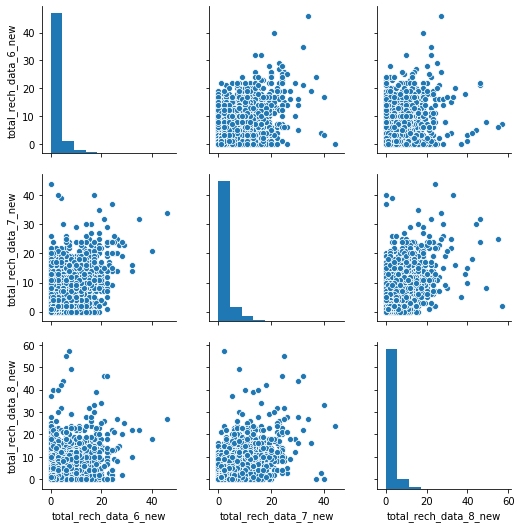

In [58]:
d1=df[['total_rech_data_6_new','total_rech_data_7_new','total_rech_data_8_new']]
sns.pairplot(d1)

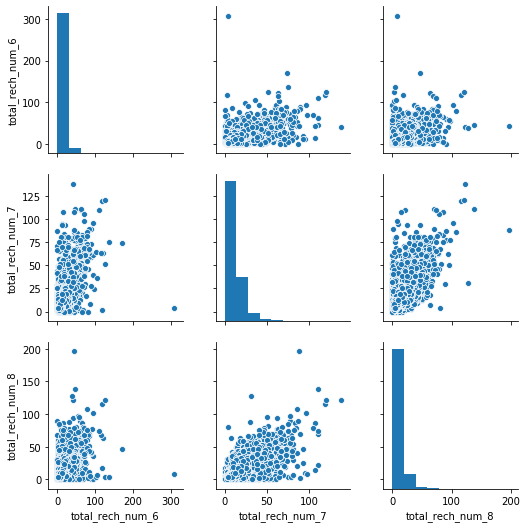

In [59]:
d1=df[['total_rech_num_6','total_rech_num_7','total_rech_num_8']]
sns.pairplot(d1)

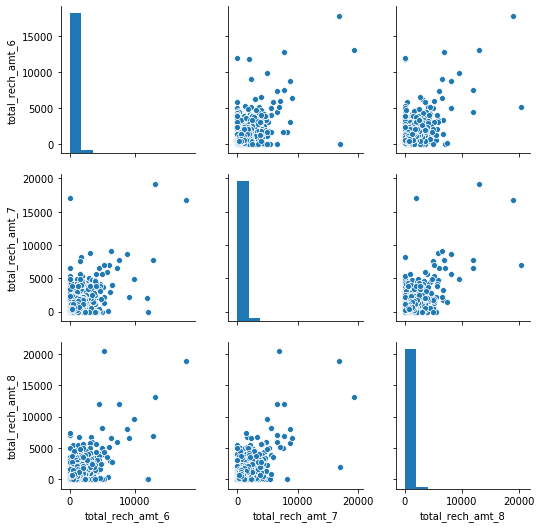

In [60]:
d1=df[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']]
sns.pairplot(d1)

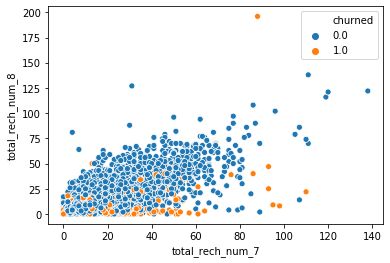

In [61]:
sns.scatterplot(x="total_rech_num_7",y="total_rech_num_8",hue="churned",data=df)


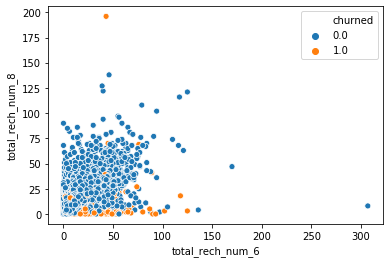

In [62]:
sns.scatterplot(x="total_rech_num_6",y="total_rech_num_8",hue="churned",data=df)


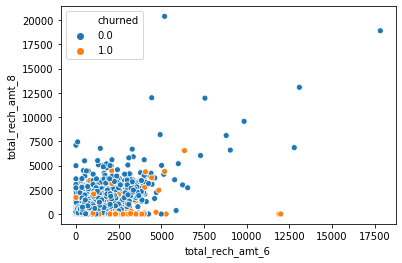

In [63]:
sns.scatterplot(x="total_rech_amt_6",y="total_rech_amt_8",hue="churned",data=df)

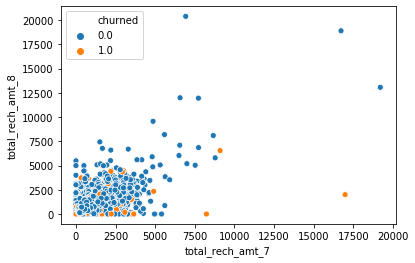

In [64]:
sns.scatterplot(x="total_rech_amt_7",y="total_rech_amt_8",hue="churned",data=df)

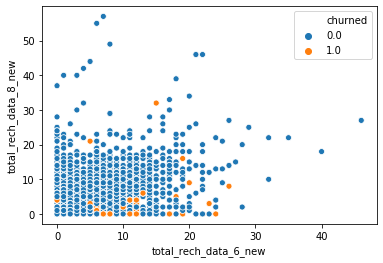

In [65]:
sns.scatterplot(x="total_rech_data_6_new",y="total_rech_data_8_new",hue="churned",data=df)

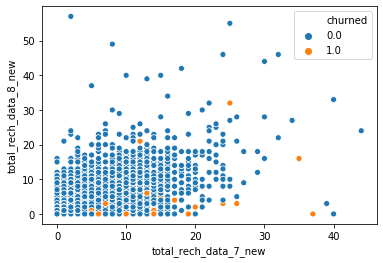

In [66]:
sns.scatterplot(x="total_rech_data_7_new",y="total_rech_data_8_new",hue="churned",data=df)

In [67]:
corr = df.corr().abs().unstack()
corr = corr[corr<1]
corr = corr[corr>.85]
corr_sorted = corr.sort_values(ascending=False)
for i in corr_sorted.index:
    print(i,corr_sorted[i])

('arpu_8', 'total_rech_amt_8') 0.946852637214375
('total_rech_amt_8', 'arpu_8') 0.946852637214375
('arpu_6', 'total_rech_amt_6') 0.9379450258534519
('total_rech_amt_6', 'arpu_6') 0.9379450258534519
('arpu_7', 'total_rech_amt_7') 0.9348241586825237
('total_rech_amt_7', 'arpu_7') 0.9348241586825237
('isd_og_mou_7', 'isd_og_mou_8') 0.927226929161137
('isd_og_mou_8', 'isd_og_mou_7') 0.927226929161137
('sachet_2g_7', 'total_rech_data_7_new') 0.9077460668902713
('total_rech_data_7_new', 'sachet_2g_7') 0.9077460668902713
('isd_og_mou_8', 'isd_og_mou_6') 0.90726715247348
('isd_og_mou_6', 'isd_og_mou_8') 0.90726715247348
('sachet_2g_6', 'total_rech_data_6_new') 0.9061586627662153
('total_rech_data_6_new', 'sachet_2g_6') 0.9061586627662153
('total_rech_data_8_new', 'sachet_2g_8') 0.9033402292828041
('sachet_2g_8', 'total_rech_data_8_new') 0.9033402292828041
('isd_og_mou_6', 'isd_og_mou_7') 0.9016664976284287
('isd_og_mou_7', 'isd_og_mou_6') 0.9016664976284287
('loc_ic_mou_6', 'total_ic_mou_6') 0

In [68]:
churned_percentage = df["churned"].sum()/df.shape[0]
churned_percentage*100

8.141203163057623

Class 0: 27531
Class 1: 2440
Proportion: 11.28 : 1


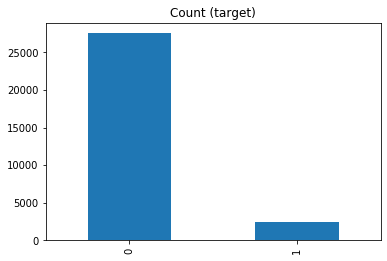

In [69]:
 
target_count = d.churned.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [70]:
X = df.loc[:, df.columns != 'churned']
y = df["churned"]
y.head()

0     1.0
7     1.0
8     0.0
21    0.0
23    0.0
Name: churned, dtype: float64

In [71]:
y = pd.DataFrame(y)
y.shape

(29971, 1)

In [72]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=seed)

# Starting with logistic regression

## Trying out with balanced ratio of churned:not_churned as 1:1

In [73]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority',random_state=seed)
X_sm, y_sm = smote.fit_sample(X_train, y_train)

Class 0: 19254
Class 1: 19254
Proportion: 1.0 : 1


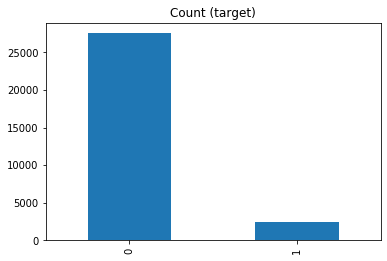

In [74]:
target_count.plot(kind='bar', title='Count (target)');
target_count = y_sm.churned.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
plt.show()
plt.show()

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sm_scaled = pd.DataFrame(scaler.fit_transform(X_sm), columns = X_sm.columns)
X_train_sm_scaled.head()

jun_vbc_3g  av_rech_amt_data_8  sachet_3g_8  last_day_rch_amt_6  \
0   -0.360885           -0.477314    -0.160774            0.085074   
1   -0.360885            1.040365    -0.160774            1.105946   
2    1.030454            4.075722    -0.160774            1.105946   
3   -0.360885           -0.200278    -0.160774           -0.224064   
4    1.012207            1.714889     4.475793           -0.410984   

   std_og_t2m_mou_6  sachet_2g_6  circle_id  loc_og_mou_7  og_others_7  \
0          4.297576    -0.449634        0.0      0.529900    -0.029277   
1         -0.493841    -0.025045        0.0     -0.446359    -0.029277   
2         -0.473116    -0.449634        0.0      1.998228     7.651489   
3         -0.408876    -0.449634        0.0      0.368503    -0.029277   
4         -0.493841    -0.449634        0.0     -0.024192    -0.029277   

   max_rech_amt_6  ...  night_pck_user_6    arpu_8  loc_og_mou_8  \
0       -0.309554  ...         -0.142094 -0.883679     -0.371155   
1        0.516947  ...         -0.142094 -0.174884     -0.421824   
2        0.516947  ...         -0.142094  2.647013      2.806995   
3        2.251434  ...         -0.142094  0.014091      1.324439   
4       -0.420142  ...         -0.142094 -0.008057     -0.394616   

   loc_og_t2m_mou_6  std_ic_t2o_mou_6  std_ic_t2f_mou_6  onnet_mou_7  \
0         -0.318432               0.0         -0.137028    -0.542789   
1         -0.434407               0.0         -0.137028    -0.546221   
2          1.246665               0.0         -0.137028    -0.240740   
3          1.027096               0.0         -0.137028    -0.194348   
4         -0.122549               0.0         -0.137028    -0.517774   

   total_rech_data_6_new  total_rech_data_7_new  total_rech_data_8_new  
0              -0.603033              -0.578301              -0.443871  
1               0.525173              -0.209146              -0.025203  
2               0.149105              -0.209146               0.812133  
3              -0.603033              -0.578301               0.393465  
4               0.525173               1.267474               1.230801  

[5 rows x 147 columns]

In [76]:
X_train_sm_scaled.shape

(38508, 147)

In [77]:
y_sm.shape

(38508, 1)

In [78]:
import statsmodels.api as sm

# Logistic regression model
logm1 = sm.GLM(y_sm,(sm.add_constant(X_train_sm_scaled)), family = sm.families.Binomial())
logm1.fit().summary()

This step takes too much time owing to multiple variables

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train_sm_scaled,y_sm)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

rfe.support_.shape

X_train_sm_scaled.columns[rfe.support_]

## Logistic regression with PCA

In [79]:
from sklearn.decomposition import PCA


In [80]:
pca = PCA(random_state=seed)

In [81]:
pca.fit(X_train_sm_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [82]:
pca.components_

array([[-1.01572438e-03,  9.44670669e-03, -1.08334692e-02, ...,
        -8.61276338e-02, -6.71275979e-02, -2.79716587e-02],
       [-1.21159479e-01, -1.55435932e-01, -4.27122115e-02, ...,
        -8.80015832e-02, -9.07884462e-02, -8.74131262e-02],
       [ 1.47900795e-01,  2.14444779e-01,  8.93876464e-02, ...,
         4.85578874e-02,  7.70532068e-02,  1.02497330e-01],
       ...,
       [-0.00000000e+00, -5.89805982e-17,  2.33425191e-05, ...,
         1.52318407e-05,  1.16201893e-04, -6.46270588e-05],
       [ 0.00000000e+00, -6.74959782e-23,  4.75002058e-17, ...,
         3.09781876e-17,  2.19577685e-16, -1.31511171e-16],
       [-0.00000000e+00, -2.77555756e-16,  2.15589536e-04, ...,
         2.41562070e-04, -1.04432550e-03, -5.96890059e-04]])

In [83]:
pca.explained_variance_ratio_

array([1.03855922e-01, 8.26233354e-02, 5.34572506e-02, 4.44475737e-02,
       3.81646801e-02, 3.15982676e-02, 2.99555126e-02, 2.70585085e-02,
       2.37203747e-02, 2.31555170e-02, 2.21393914e-02, 2.00029027e-02,
       1.94243288e-02, 1.91223289e-02, 1.76384153e-02, 1.63180613e-02,
       1.54203843e-02, 1.51121393e-02, 1.39487921e-02, 1.33720544e-02,
       1.29386080e-02, 1.22329421e-02, 1.20187070e-02, 1.15708979e-02,
       1.07949739e-02, 1.06980165e-02, 1.01840711e-02, 9.43154317e-03,
       8.81525933e-03, 8.57120753e-03, 8.23086320e-03, 7.95892981e-03,
       7.83783603e-03, 7.66222675e-03, 7.30273982e-03, 7.17276611e-03,
       7.00274933e-03, 6.96191069e-03, 6.76661519e-03, 6.67434490e-03,
       6.49498709e-03, 6.45582143e-03, 6.30815764e-03, 6.06592656e-03,
       6.00507264e-03, 5.69099839e-03, 5.53614128e-03, 5.15538146e-03,
       4.98651294e-03, 4.88771373e-03, 4.87054208e-03, 4.60181239e-03,
       4.56995904e-03, 4.35120344e-03, 4.23318362e-03, 4.00712636e-03,
      

In [84]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [85]:

min_explained_var_percentage = 0.90
def get_numberOf_components(var_cumu, min_explained_var_percentage):
    for i in range(0,var_cumu.shape[0]):
        if var_cumu[i]>min_explained_var_percentage:
            return i
min_components_90 =  get_numberOf_components(var_cumu,min_explained_var_percentage )       
print(min_components_90, " - ", var_cumu[min_components_90])

57  -  0.9032215233438491


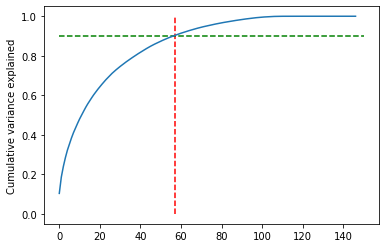

In [86]:
fig = plt.figure(figsize=[6,4])
plt.vlines(x=min_components_90, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=150, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()


In [87]:
from sklearn.decomposition import IncrementalPCA

In [88]:
pca_final = IncrementalPCA(n_components=min_components_90)

In [89]:
df_train_pca = pca_final.fit_transform(X_train_sm_scaled)

In [90]:
df_train_pca.shape

(38508, 57)

In [91]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [92]:
corrmat.shape

(57, 57)

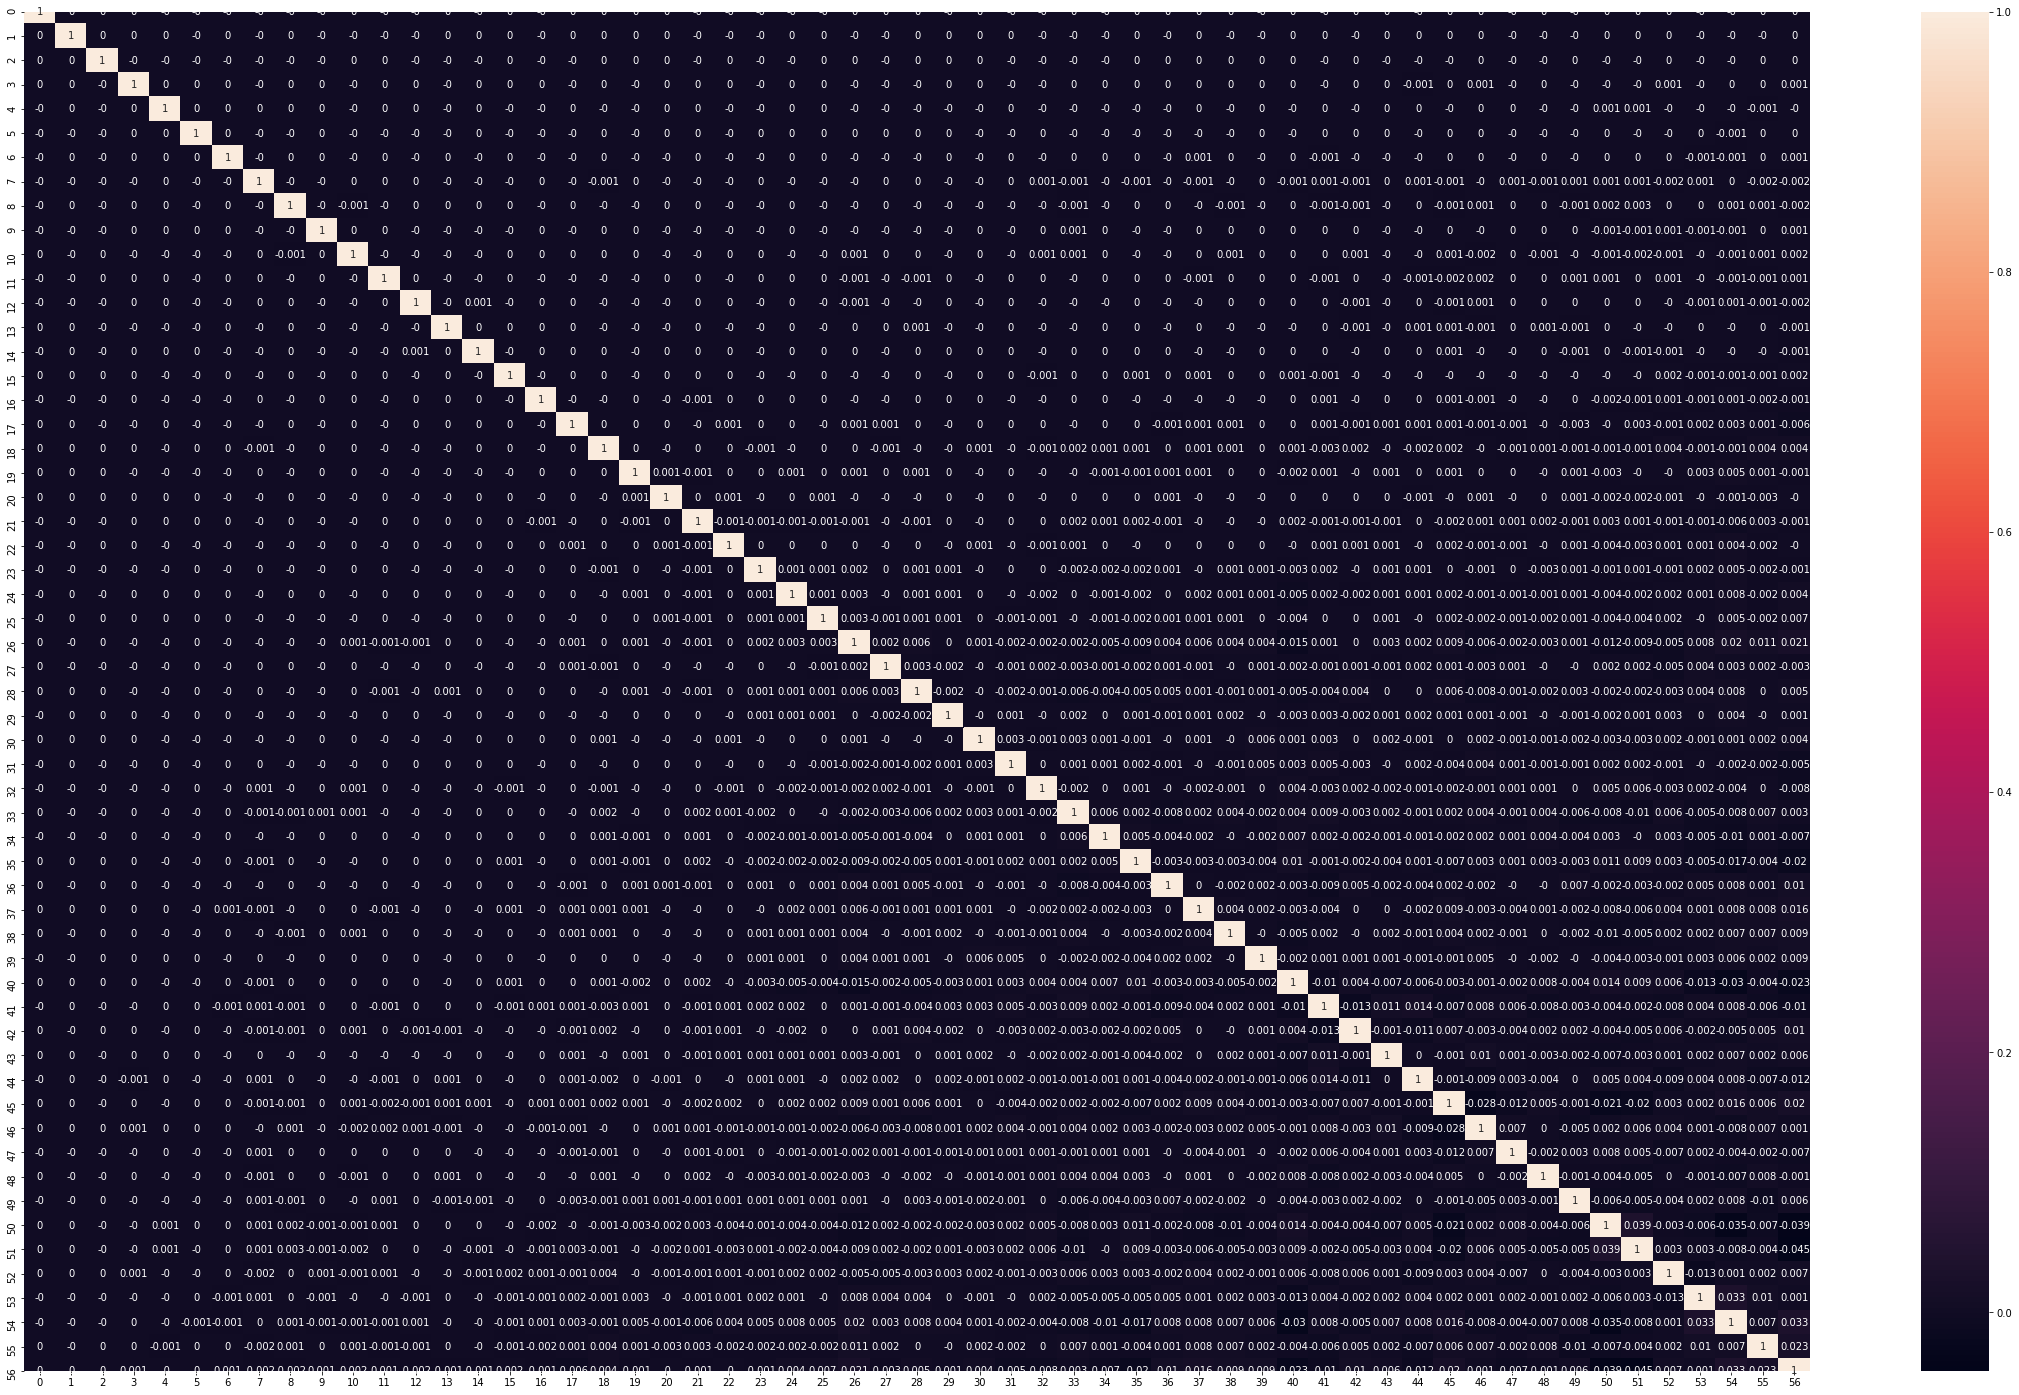

In [93]:
fig = plt.figure(figsize=[40,25])
p = pd.DataFrame(corrmat).round(3)
sns.heatmap(p, annot=True)
plt.show()

## From above matrix it is visibly clear that the components are well independent

In [94]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8992, 57)

In [95]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [96]:

def print_cutoff_stats(churned, churn_pred_At_cutoff):    
        confusion = metrics.confusion_matrix( churned, churn_pred_At_cutoff )
        print(confusion)
        print("accuracy score: ",metrics.accuracy_score(churned, churn_pred_At_cutoff))
        print("F1 SCORE :",metrics.f1_score(churned, churn_pred_At_cutoff))

        TP = confusion[1,1] # true positive 
        TN = confusion[0,0] # true negatives
        FP = confusion[0,1] # false positives
        FN = confusion[1,0] # false negatives

        # Let's see the sensitivity of our logistic regression model
        print("Sensitivity: ",TP / float(TP+FN))

        # Let us calculate specificity
        print("Specificity: ",TN / float(TN+FP))

        # Calculate false postive rate - predicting churn when customer does not have churned
        print("False positive rate: ",FP/ float(TN+FP))

        # positive predictive value 
        print ("Precision or Positive predictive value: ",TP / float(TP+FP))

        # Negative predictive value
        print ("Negative predictive value: ",TN / float(TN+ FN))
        

        
def print_stats(churned, churned_pred_probs):
    # Confusion matrix 
    cutoffs = np.arange(0,1.1,0.1)
    churned_pred = pd.DataFrame(np.zeros((churned.shape[0],len(cutoffs)),dtype=int), columns = cutoffs)
    for i in range(0,len(cutoffs)):
        churned_pred[churned_pred.columns[i]] = churned_pred_probs.apply(lambda x: 1 if x>cutoffs[i] else 0)
    for cutoff_selected in cutoffs:
        print("======================")
        print("cutoff_selected", cutoff_selected)                        
        print_cutoff_stats(churned,churned_pred[cutoff_selected])


### Applying logistic regression on the data on our Principal components

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [98]:
learner_pca = LogisticRegression()

In [99]:
model_pca = learner_pca.fit(df_train_pca, y_sm)

In [100]:
pred_probs_train = model_pca.predict_proba(df_train_pca)

In [101]:
pred_probs_train

array([[3.02699897e-02, 9.69730010e-01],
       [4.34470024e-01, 5.65529976e-01],
       [9.99050226e-01, 9.49774344e-04],
       ...,
       [1.91051207e-01, 8.08948793e-01],
       [9.52120106e-02, 9.04787989e-01],
       [3.08930159e-01, 6.91069841e-01]])

In [102]:
"{:2.2}".format(metrics.roc_auc_score(y_sm, pred_probs_train[:,1]))

'0.9'

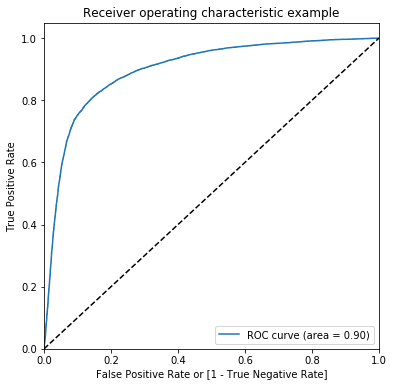

0
0      9.697300e-01
1      5.655300e-01
2      9.497743e-04
3      2.484592e-02
4      4.816938e-07
...             ...
38503  7.583913e-01
38504  5.969161e-01
38505  8.089488e-01
38506  9.047880e-01
38507  6.910698e-01

[38508 rows x 1 columns]

In [103]:
draw_roc(y_sm,pred_probs_train[:,1])
pred_probs= pd.DataFrame(pred_probs_train[:,1])
pred_probs

In [104]:
print_stats(y_sm, pred_probs[0])
 

cutoff_selected 0.0
[[    0 19254]
 [    0 19254]]
accuracy score:  0.5
F1 SCORE : 0.6666666666666666
Sensitivity:  1.0
Specificity:  0.0
False positive rate:  1.0
Precision or Positive predictive value:  0.5
Negative predictive value:  nan
cutoff_selected 0.1
[[ 7474 11780]
 [  471 18783]]
accuracy score:  0.6818583151552924
F1 SCORE : 0.7540799325531445
Sensitivity:  0.9755375506388283
Specificity:  0.3881790796717565
False positive rate:  0.6118209203282435
Precision or Positive predictive value:  0.6145666328567222
Negative predictive value:  0.9407174323473882
cutoff_selected 0.2
[[10423  8831]
 [  920 18334]]
accuracy score:  0.7467798898930093
F1 SCORE : 0.7899351558629011
Sensitivity:  0.9522177209930404
Specificity:  0.541342058792978
False positive rate:  0.4586579412070219
Precision or Positive predictive value:  0.6749125713233941
Negative predictive value:  0.9188927091598342
cutoff_selected 0.30000000000000004
[[12522  6732]
 [ 1530 17724]]
accuracy score:  0.785447179806

### From above metrics, giving more precedence to sensitivity, cutoff selected is at 0.4  
    cutoff_selected 0.4
    [[14193  5061]
    [ 2138 17116]]
    accuracy score:  0.8130518333852705
    F1 SCORE : 0.8262412203422558
    Sensitivity:  0.8889581385686092
    Specificity:  0.737145528201932
    False positive rate:  0.2628544717980679
    Positive predictive value:  0.771790593858502
    Negative predictive value:  0.8690833384361031

## Model evaluation on the test set

In [105]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8992, 57)

In [106]:
df_test_pca

array([[ 2048.4171365 ,  -262.26318134,  2651.19442623, ...,
          425.59618445,  -690.07350428, -1326.18897069],
       [  722.77951214,  -115.15136901,   421.67567973, ...,
          -11.89116667,    78.36841066,   -74.70777764],
       [ 5506.08737151, -2523.45844312,  2846.96394496, ...,
          593.77476461,  -601.27623819, -1466.9191948 ],
       ...,
       [ 1671.31183671,  -460.92800959,   722.70207101, ...,
          144.95960542,    37.9984324 ,  -235.61995111],
       [ 4409.55170944,  -199.94897514,    25.73270298, ...,
         -213.00162547,   110.16818698,   189.6122578 ],
       [ 1086.07944938,  -416.38731062,  -116.57091092, ...,
          -31.1936999 ,    11.74191466,   -18.53206775]])

In [107]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [108]:
pred_probs_test

array([[1.00000000e+000, 1.58716769e-143],
       [1.00000000e+000, 2.36453095e-308],
       [1.00000000e+000, 0.00000000e+000],
       ...,
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 5.57123855e-223]])

In [109]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.86'

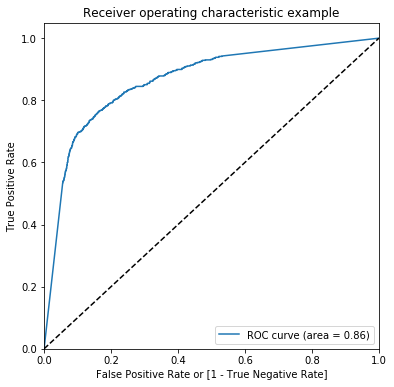

0
0     1.587168e-143
1     2.364531e-308
2      0.000000e+00
3      0.000000e+00
4      0.000000e+00
...             ...
8987   0.000000e+00
8988   0.000000e+00
8989   0.000000e+00
8990   0.000000e+00
8991  5.571239e-223

[8992 rows x 1 columns]

In [110]:
draw_roc(y_test,pred_probs_test[:,1])
pred_probs= pd.DataFrame(pred_probs_test[:,1])
pred_probs

In [111]:
y_test

churned
36071      0.0
28527      1.0
94267      0.0
4500       0.0
21575      0.0
...        ...
12273      0.0
64394      0.0
77946      0.0
16675      0.0
55636      0.0

[8992 rows x 1 columns]

In [112]:
y_pred_at_cutoff =   pred_probs[0].apply(lambda x: 1 if x>=0.4 else 0)
y_pred_at_cutoff 

print_cutoff_stats(y_test, y_pred_at_cutoff)

metrics.accuracy_score(y_test, y_pred_at_cutoff)
print("{:2.2f}".format(metrics.roc_auc_score(y_test, y_pred_at_cutoff)))





[[7747  530]
 [ 308  407]]
accuracy score:  0.906806049822064
F1 SCORE : 0.4927360774818401
Sensitivity:  0.5692307692307692
Specificity:  0.9359671378518787
False positive rate:  0.0640328621481213
Precision or Positive predictive value:  0.4343649946638207
Negative predictive value:  0.9617628801986344
0.75


## Best sensitivity aound 57% in 1:1 balanced data at cutoff 40% 
> Seeing a decline in sensitivity in testing.
> Surely there can be a better modelling<br/>
> Reworking with rebalancing the classes by SMOTE

## Trying out with balanced ratio of churned:not_churned as 35:65

In [113]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=seed)

In [114]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.53846,random_state=seed)
X_sm, y_sm = smote.fit_sample(X_train, y_train)

Class 0: 19254
Class 1: 10367
Proportion: 1.86 : 1


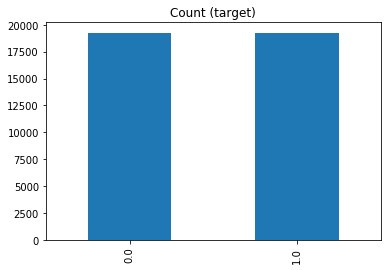

In [115]:
target_count.plot(kind='bar', title='Count (target)');
target_count = y_sm.churned.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
plt.show()
plt.show()

In [116]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sm_scaled = pd.DataFrame(scaler.fit_transform(X_sm), columns = X_sm.columns)
X_train_sm_scaled

jun_vbc_3g  av_rech_amt_data_8  sachet_3g_8  last_day_rch_amt_6  \
0       -0.365460           -0.533313    -0.171410            0.077786   
1       -0.365460            0.891184    -0.171410            1.090725   
2        0.941872            3.740180    -0.171410            1.090725   
3       -0.365460           -0.273286    -0.171410           -0.228949   
4        0.924726            1.524295     4.110173           -0.414416   
...           ...                 ...          ...                 ...   
29616   -0.365460           -0.533313    -0.171410            0.041272   
29617   -0.365406           -0.526154    -0.171410           -0.328534   
29618   -0.365460           -0.533313    -0.171410           -0.375139   
29619   -0.365460           -0.533313    -0.171410           -0.177205   
29620   -0.365460           -0.533313    -0.171410           -0.706885   

       std_og_t2m_mou_6  sachet_2g_6  circle_id  loc_og_mou_7  og_others_7  \
0              4.602010    -0.441704        0.0      0.431392    -0.027122   
1             -0.477497    -0.024530        0.0     -0.479192    -0.027122   
2             -0.455526    -0.441704        0.0      1.800943     7.087727   
3             -0.387424    -0.441704        0.0      0.280853    -0.027122   
4             -0.477497    -0.441704        0.0     -0.085425    -0.027122   
...                 ...          ...        ...           ...          ...   
29616          4.325491    -0.441704        0.0     -0.432194    -0.027122   
29617         -0.023985    -0.441704        0.0      0.597874    -0.027122   
29618          0.081301    -0.441704        0.0     -0.288115    -0.027122   
29619          3.420688    -0.441704        0.0     -0.480641    -0.027122   
29620         -0.477324    -0.441704        0.0     -0.600125    -0.027122   

       max_rech_amt_6  ...  night_pck_user_6    arpu_8  loc_og_mou_8  \
0           -0.319315  ...         -0.133055 -0.967175     -0.431381   
1            0.504070  ...         -0.133055 -0.276944     -0.477378   
2            0.504070  ...         -0.133055  2.471044      2.453752   
3            2.232019  ...         -0.133055 -0.092919      1.107884   
4           -0.429486  ...         -0.133055 -0.114487     -0.452679   
...               ...  ...               ...       ...           ...   
29616       -0.319315  ...         -0.133055 -0.947697     -0.581617   
29617       -0.252518  ...         -0.133055  0.574085      0.629547   
29618       -0.589305  ...         -0.133055  0.346546     -0.319770   
29619       -0.319315  ...         -0.133055 -0.938793     -0.573029   
29620        1.581503  ...         -0.133055 -0.613418     -0.565052   

       loc_og_t2m_mou_6  std_ic_t2o_mou_6  std_ic_t2f_mou_6  onnet_mou_7  \
0             -0.343920               0.0         -0.134899    -0.542688   
1             -0.453890               0.0         -0.134899    -0.546148   
2              1.140153               0.0         -0.134899    -0.238211   
3              0.931950               0.0         -0.134899    -0.191447   
4             -0.158178               0.0         -0.134899    -0.517472   
...                 ...               ...               ...          ...   
29616         -0.446232               0.0         -0.115523    -0.519284   
29617          1.015281               0.0         -0.134899     1.347370   
29618         -0.263360               0.0         -0.134899     1.030217   
29619         -0.538938               0.0         -0.134899    -0.405300   
29620         -0.614200               0.0         -0.089243     0.582338   

       total_rech_data_6_new  total_rech_data_7_new  total_rech_data_8_new  
0                  -0.605611              -0.593687              -0.481347  
1                   0.515596              -0.237976              -0.098697  
2                   0.141860              -0.237976               0.666601  
3                  -0.605611              -0.593687               0.283952  
4                 

In [117]:
y_sm.shape

(29621, 1)

In [118]:
pca_final = PCA(0.9, random_state=seed)

In [119]:
df_train_pca = pca_final.fit_transform(X_train_sm_scaled)

In [120]:
df_train_pca.shape

(29621, 57)

In [121]:
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat

array([[ 1.00000000e+00,  1.27965970e-16,  8.65375087e-17, ...,
         7.15884543e-18,  1.21331663e-16, -1.66825190e-17],
       [ 1.27965970e-16,  1.00000000e+00, -1.06879158e-15, ...,
        -2.22276953e-16,  3.84341873e-17,  6.52670944e-17],
       [ 8.65375087e-17, -1.06879158e-15,  1.00000000e+00, ...,
         9.31559149e-17, -7.70684313e-17,  1.36090289e-17],
       ...,
       [ 7.15884543e-18, -2.22276953e-16,  9.31559149e-17, ...,
         1.00000000e+00,  1.20491271e-16, -8.41229848e-17],
       [ 1.21331663e-16,  3.84341873e-17, -7.70684313e-17, ...,
         1.20491271e-16,  1.00000000e+00, -5.92231883e-16],
       [-1.66825190e-17,  6.52670944e-17,  1.36090289e-17, ...,
        -8.41229848e-17, -5.92231883e-16,  1.00000000e+00]])

In [122]:
corrmat.shape

(57, 57)

In [123]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8992, 57)

In [124]:
learner_pca = LogisticRegression()

In [125]:
model_pca = learner_pca.fit(df_train_pca, y_sm)

In [126]:
pred_probs_train = model_pca.predict_proba(df_train_pca)

In [127]:
pred_probs_train.shape

(29621, 2)

In [128]:
"{:2.2}".format(metrics.roc_auc_score(y_sm, pred_probs_train[:,1]))

'0.9'

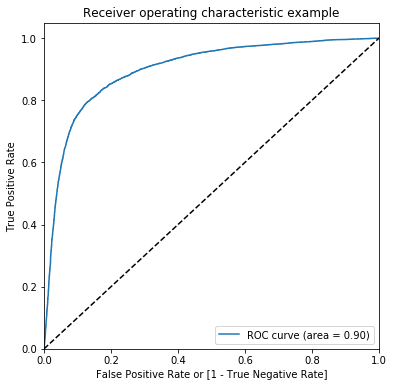

0
0      0.952717
1      0.385838
2      0.000376
3      0.021032
4      0.000001
...         ...
29616  0.869400
29617  0.407214
29618  0.253727
29619  0.897106
29620  0.879504

[29621 rows x 1 columns]

In [129]:
draw_roc(y_sm,pred_probs_train[:,1])
pred_probs= pd.DataFrame(pred_probs_train[:,1])
pred_probs

In [130]:
print_stats(y_sm, pred_probs[0])
 

cutoff_selected 0.0
[[    0 19254]
 [    0 10367]]
accuracy score:  0.34998818405860704
F1 SCORE : 0.5185055516654996
Sensitivity:  1.0
Specificity:  0.0
False positive rate:  1.0
Precision or Positive predictive value:  0.34998818405860704
Negative predictive value:  nan
cutoff_selected 0.1
[[9819 9435]
 [ 446 9921]]
accuracy score:  0.666419094561291
F1 SCORE : 0.6675638394509302
Sensitivity:  0.9569788752773223
Specificity:  0.5099719538797133
False positive rate:  0.4900280461202867
Precision or Positive predictive value:  0.5125542467451953
Negative predictive value:  0.9565513882123722
cutoff_selected 0.2
[[12920  6334]
 [  885  9482]]
accuracy score:  0.7562877688126667
F1 SCORE : 0.7242867509452697
Sensitivity:  0.9146329700009646
Specificity:  0.6710293964890413
False positive rate:  0.32897060351095875
Precision or Positive predictive value:  0.5995194739504299
Negative predictive value:  0.9358927924664976
cutoff_selected 0.30000000000000004
[[14826  4428]
 [ 1348  9019]]
ac

<pre>
cutoff_selected 0.4
[[16171  3083]
 [ 1856  8511]]
accuracy score:  0.8332601870294724
F1 SCORE : 0.7751013159692182
Sensitivity:  0.8209703868042828
Specificity:  0.8398774280668951
False positive rate:  0.1601225719331048
Positive predictive value:  0.7340865965154391
Negative predictive value:  0.8970433239030343
</pre>

## Model evaluation on the test set

In [131]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8992, 57)

In [132]:
df_test_pca

array([[ 2.02579680e+03, -3.81241662e+02,  2.72196395e+03, ...,
        -8.70703382e+01,  2.84785188e+02, -1.11130121e+01],
       [ 7.18781568e+02, -1.72704654e+02,  4.25854680e+02, ...,
        -1.06073286e+02, -7.16535883e+01,  2.13486625e+00],
       [ 5.35060253e+03, -2.91384871e+03,  3.07642564e+03, ...,
         1.30592658e+02, -1.17278774e+02,  7.39716829e+01],
       ...,
       [ 1.64403388e+03, -5.84646258e+02,  7.55002441e+02, ...,
         3.49657822e+01, -1.70223689e+02,  4.77744706e+01],
       [ 4.40748658e+03, -5.39406180e+02,  4.91688264e+01, ...,
        -7.05259242e+01,  2.45228133e+01,  1.13685305e+02],
       [ 1.05453913e+03, -5.08867416e+02, -9.96309990e+01, ...,
         9.75228268e+00,  3.57843455e+01, -1.48535982e+01]])

In [133]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [134]:
pred_probs_test

array([[1.00000000e+000, 4.78019506e-155],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       ...,
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 4.58444304e-257]])

In [135]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.86'

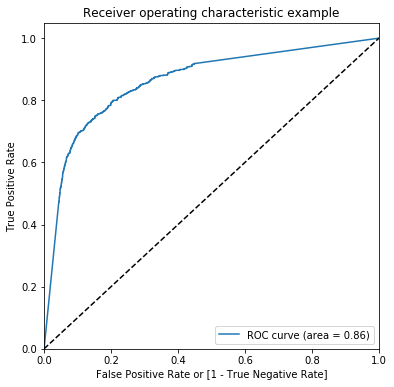

0
0     4.780195e-155
1      0.000000e+00
2      0.000000e+00
3      0.000000e+00
4      0.000000e+00
...             ...
8987   0.000000e+00
8988   0.000000e+00
8989   0.000000e+00
8990   0.000000e+00
8991  4.584443e-257

[8992 rows x 1 columns]

In [136]:
draw_roc(y_test,pred_probs_test[:,1])
pred_probs= pd.DataFrame(pred_probs_test[:,1])
pred_probs

[[7863  414]
 [ 342  373]]
accuracy score:  0.9159252669039146
F1 SCORE : 0.4966711051930759
Sensitivity:  0.5216783216783217
Specificity:  0.9499818774918448
False positive rate:  0.05001812250815513
Precision or Positive predictive value:  0.47395171537484115
Negative predictive value:  0.9583180987202925


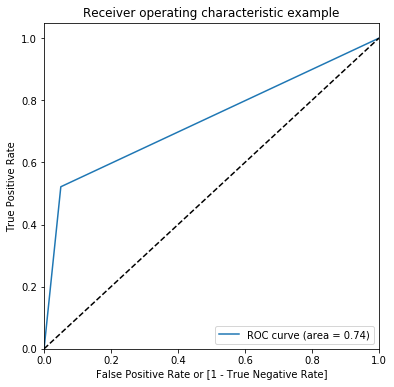

0.74


In [137]:

y_pred_at_cutoff =   pred_probs[0].apply(lambda x: 1 if x>=0.4 else 0)
y_pred_at_cutoff 

print_cutoff_stats(y_test, y_pred_at_cutoff)

metrics.accuracy_score(y_test, y_pred_at_cutoff)
draw_roc(y_test, y_pred_at_cutoff)
print("{:2.2f}".format(metrics.roc_auc_score(y_test, y_pred_at_cutoff)))





## Best sensitivity at 53% in 35:65 balanced data at cutoff 40%. Not much improvement shown compared to 1:1 class balanced data. Moving on to Naive bayes modelling

## Modelling with NaiveBayes - Bernoulli classifier
### Without PCA

In [138]:
df_nb = masterdf.copy()
X = df_nb.loc[:, df_nb.columns != 'churned']
y = df_nb["churned"]

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=seed)


Class 0: 19254
Class 1: 19254
Proportion: 1.0 : 1


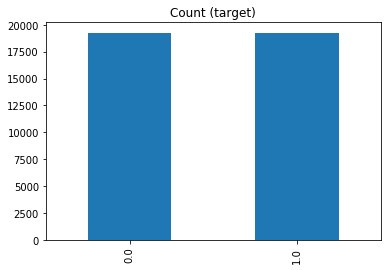

In [139]:

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority',random_state=seed)
X_sm, y_sm = smote.fit_sample(X_train, y_train)

y_sm_df = pd.DataFrame(y_sm, columns=["churned"]) 
target_count = y_sm_df.churned.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)');

plt.show()
plt.show()

In [140]:

from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
X_train_sm_scaled = pd.DataFrame(mmscaler.fit_transform(X_sm), columns = X_sm.columns)
X_test_scaled =  pd.DataFrame(mmscaler.transform(X_test), columns = X_test.columns)
X_test_scaled

jun_vbc_3g  av_rech_amt_data_8  sachet_3g_8  last_day_rch_amt_6  \
0       0.002827            0.114461      0.02439            0.062344   
1       0.000000            0.000000      0.00000            0.000000   
2       0.184693            0.229215      0.04878            0.037406   
3       0.000000            0.029274      0.00000            0.004988   
4       0.000000            0.000000      0.00000            0.012469   
...          ...                 ...          ...                 ...   
8987    0.000000            0.000000      0.00000            0.007481   
8988    0.000000            0.000000      0.00000            0.049875   
8989    0.035670            0.042447      0.00000            0.062344   
8990    0.000000            0.000000      0.00000            0.027431   
8991    0.000000            0.019906      0.00000            0.002494   

      std_og_t2m_mou_6  sachet_2g_6  circle_id  loc_og_mou_7  og_others_7  \
0             0.051987     0.000000        0.0      0.083589          0.0   
1             0.005463     0.000000        0.0      0.000294          0.0   
2             0.003998     0.071429        0.0      0.164355          0.0   
3             0.011619     0.119048        0.0      0.026708          0.0   
4             0.002820     0.000000        0.0      0.034391          0.0   
...                ...          ...        ...           ...          ...   
8987          0.050128     0.000000        0.0      0.003797          0.0   
8988          0.000616     0.000000        0.0      0.105292          0.0   
8989          0.003746     0.023810        0.0      0.044606          0.0   
8990          0.014732     0.000000        0.0      0.178276          0.0   
8991          0.000000     0.095238        0.0      0.007276          0.0   

      max_rech_amt_6  ...  night_pck_user_6    arpu_8  loc_og_mou_8  \
0           0.062344  ...               0.0  0.113117      0.004090   
1           0.000000  ...               0.0  0.094542      0.000000   
2           0.038404  ...               0.0  0.151944      0.132081   
3           0.007481  ...               0.0  0.115240      0.027120   
4           0.027431  ...               0.0  0.095701      0.028478   
...              ...  ...               ...       ...           ...   
8987        0.012469  ...               0.0  0.113049      0.004444   
8988        0.049875  ...               0.0  0.117050      0.071546   
8989        0.062344  ...               0.0  0.110740      0.015126   
8990        0.027431  ...               0.0  0.139678      0.090215   
8991        0.007481  ...               0.0  0.097853      0.010087   

      loc_og_t2m_mou_6  std_ic_t2o_mou_6  std_ic_t2f_mou_6  onnet_mou_7  \
0             0.005250               0.0          0.000000     0.003568   
1             0.002173               0.0          0.000000     0.002643   
2             0.268860               0.0          0.000000     0.044998   
3             0.054540               0.0          0.000000     0.005303   
4             0.090827               0.0          0.000000     0.004567   
...                ...               ...               ...          ...   
8987          0.006038               0.0          0.000000     0.000498   
8988          0.088045               0.0          0.000000     0.008885   
8989          0.011705               0.0          0.000000     0.002674   
8990          0.116939               0.0          0.000000     0.058228   
8991          0.006757               0.0          0.000984     0.002745   

      total_rech_data_6_new  total_rech_data_7_new  total_rech_data_8_new  
0                  0.021739               0.136364               0.054545  
1                  0.000000               0.000000               0.000000  
2                  0.173913               0.159091               0.090909  
3                  0.108696               0.090909               0.072727  
4                  0.000000               0.000000               0.000

In [141]:

from sklearn.naive_bayes import BernoulliNB

# instantiate bernoulli NB object
bnb = BernoulliNB()

# fit 
bnb.fit(X_train_sm_scaled,y_sm)

# predict class
y_pred_class = bnb.predict(X_test_scaled)

# predict probability
y_pred_proba =bnb.predict_proba(X_test_scaled)


# accuracy
from sklearn import metrics
# y_test_series = y_test["churned"]
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
print("accuracy",metrics.accuracy_score(y_test, y_pred_class))
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

specificity = TN / float(TN + FP)

print("specificity",specificity)

precision = TP / float(TP + FP)

print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))


[[6791 1486]
 [ 189  526]]
accuracy 0.8137233096085409
sensitivity 0.7356643356643356
specificity 0.820466352543192
PRECISION SCORE : 0.2614314115308151
RECALL SCORE : 0.7356643356643356
F1 SCORE : 0.3857719105243858


## Modelling with NaiveBayes - Bernoulli classifier
### With PCA

In [142]:
df_nb = masterdf.copy()
X = df_nb.loc[:, df_nb.columns != 'churned']
y = df_nb["churned"]

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=seed)


In [143]:

from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(mmscaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled =  pd.DataFrame(mmscaler.transform(X_test), columns = X_test.columns)
X_test_scaled

jun_vbc_3g  av_rech_amt_data_8  sachet_3g_8  last_day_rch_amt_6  \
0       0.002827            0.114461      0.02439            0.062344   
1       0.000000            0.000000      0.00000            0.000000   
2       0.184693            0.229215      0.04878            0.037406   
3       0.000000            0.029274      0.00000            0.004988   
4       0.000000            0.000000      0.00000            0.012469   
...          ...                 ...          ...                 ...   
8987    0.000000            0.000000      0.00000            0.007481   
8988    0.000000            0.000000      0.00000            0.049875   
8989    0.035670            0.042447      0.00000            0.062344   
8990    0.000000            0.000000      0.00000            0.027431   
8991    0.000000            0.019906      0.00000            0.002494   

      std_og_t2m_mou_6  sachet_2g_6  circle_id  loc_og_mou_7  og_others_7  \
0             0.051987     0.000000        0.0      0.083589          0.0   
1             0.005463     0.000000        0.0      0.000294          0.0   
2             0.003998     0.071429        0.0      0.164355          0.0   
3             0.011619     0.119048        0.0      0.026708          0.0   
4             0.002820     0.000000        0.0      0.034391          0.0   
...                ...          ...        ...           ...          ...   
8987          0.050128     0.000000        0.0      0.003797          0.0   
8988          0.000616     0.000000        0.0      0.105292          0.0   
8989          0.003746     0.023810        0.0      0.044606          0.0   
8990          0.014732     0.000000        0.0      0.178276          0.0   
8991          0.000000     0.095238        0.0      0.007276          0.0   

      max_rech_amt_6  ...  night_pck_user_6    arpu_8  loc_og_mou_8  \
0           0.062344  ...               0.0  0.113117      0.004090   
1           0.000000  ...               0.0  0.094542      0.000000   
2           0.038404  ...               0.0  0.151944      0.132081   
3           0.007481  ...               0.0  0.115240      0.027120   
4           0.027431  ...               0.0  0.095701      0.028478   
...              ...  ...               ...       ...           ...   
8987        0.012469  ...               0.0  0.113049      0.004444   
8988        0.049875  ...               0.0  0.117050      0.071546   
8989        0.062344  ...               0.0  0.110740      0.015126   
8990        0.027431  ...               0.0  0.139678      0.090215   
8991        0.007481  ...               0.0  0.097853      0.010087   

      loc_og_t2m_mou_6  std_ic_t2o_mou_6  std_ic_t2f_mou_6  onnet_mou_7  \
0             0.005250               0.0          0.000000     0.003568   
1             0.002173               0.0          0.000000     0.002643   
2             0.268860               0.0          0.000000     0.044998   
3             0.054540               0.0          0.000000     0.005303   
4             0.090827               0.0          0.000000     0.004567   
...                ...               ...               ...          ...   
8987          0.006038               0.0          0.000000     0.000498   
8988          0.088045               0.0          0.000000     0.008885   
8989          0.011705               0.0          0.000000     0.002674   
8990          0.116939               0.0          0.000000     0.058228   
8991          0.006757               0.0          0.000984     0.002745   

      total_rech_data_6_new  total_rech_data_7_new  total_rech_data_8_new  
0                  0.021739               0.136364               0.054545  
1                  0.000000               0.000000               0.000000  
2                  0.173913               0.159091               0.090909  
3                  0.108696               0.090909               0.072727  
4                  0.000000               0.000000               0.000

In [144]:
from sklearn.decomposition import PCA


pca = PCA(0.95,random_state=seed)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
X_train_pca

array([[ 1.38653186e-02, -3.22545438e-01,  4.46526438e-01, ...,
         6.54856479e-03, -4.29723445e-03,  5.48804229e-04],
       [-1.37939151e-01, -1.60679675e-01, -1.49064143e-01, ...,
        -1.74862643e-02, -1.83100094e-02,  5.35337349e-03],
       [-8.95284228e-02,  6.79746173e-02,  6.11742751e-02, ...,
         3.90323802e-03, -3.33090995e-02,  1.75775749e-02],
       ...,
       [-1.55562684e-01, -1.48027834e-01, -1.57794038e-01, ...,
        -1.44474321e-02, -4.11804980e-05,  5.05449845e-03],
       [-9.16875423e-02,  4.35005378e-01, -1.45394046e-01, ...,
        -5.61475388e-03,  8.00016817e-03,  1.06906148e-02],
       [-1.15954697e-01, -1.57731578e-01, -4.32807687e-02, ...,
        -9.35468667e-03,  2.10147203e-02,  4.93442924e-02]])

In [145]:
print(X_train_pca.shape)
print(X_test_pca.shape)

(20979, 40)
(8992, 40)


X_sm, y_sm = X_train_pca, y_train

Class 0: 19254
Class 1: 19254
Proportion: 1.0 : 1


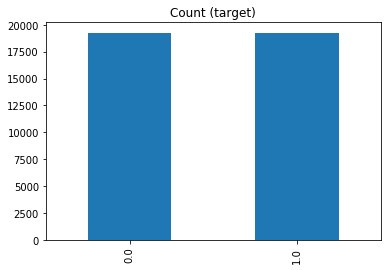

In [146]:

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority',random_state=seed)
X_sm, y_sm = smote.fit_sample(X_train_pca, y_train)

y_sm_df = pd.DataFrame(y_sm, columns=["churned"]) 

target_count.plot(kind='bar', title='Count (target)');
target_count = y_sm_df.churned.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
plt.show()
plt.show()

In [147]:

from sklearn.naive_bayes import BernoulliNB

# instantiate bernoulli NB object
bnb = BernoulliNB()

# fit 
bnb.fit(X_sm,y_sm)

# predict class
y_pred_class = bnb.predict(X_test_pca)

# predict probability
y_pred_proba =bnb.predict_proba(X_test_pca)


# accuracy
from sklearn import metrics
# y_test_series = y_test["churned"]
print("accuracy",metrics.accuracy_score(y_test, y_pred_class))
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

specificity = TN / float(TN + FP)

print("specificity",specificity)

precision = TP / float(TP + FP)

print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))


accuracy 0.7640124555160143
[[6357 1920]
 [ 202  513]]
sensitivity 0.7174825174825175
specificity 0.768031895614353
PRECISION SCORE : 0.21085080147965474
RECALL SCORE : 0.7174825174825175
F1 SCORE : 0.32592121982210925


In [148]:

from sklearn.naive_bayes import GaussianNB

# instantiate bernoulli NB object
gnb = GaussianNB()

# fit 
gnb.fit(X_sm,y_sm)

# predict class
y_pred_class = gnb.predict(X_test_pca)

# predict probability
y_pred_proba =gnb.predict_proba(X_test_pca)


# accuracy
from sklearn import metrics
# y_test_series = y_test["churned"]
print("accuracy",metrics.accuracy_score(y_test, y_pred_class))
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

specificity = TN / float(TN + FP)

print("specificity",specificity)

precision = TP / float(TP + FP)

print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))


accuracy 0.4901023131672598
[[3833 4444]
 [ 141  574]]
sensitivity 0.8027972027972028
specificity 0.4630904917240546
PRECISION SCORE : 0.11438820247110403
RECALL SCORE : 0.8027972027972028
F1 SCORE : 0.20024420024420025


## It is seen that bernoulli naive bayes gives specificity of 77% at sensitivity of 71% until now.
### Starting with SVM
#### Exploring the feasibility of SVM

In [149]:
df_nb = masterdf.copy()
X = df_nb.loc[:, df_nb.columns != 'churned']
y = df_nb["churned"]

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=seed)



from sklearn.preprocessing import StandardScaler
sscaler = StandardScaler()
X_train_scaled = pd.DataFrame(sscaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled =  pd.DataFrame(sscaler.transform(X_test), columns = X_test.columns)


In [150]:

from sklearn.decomposition import PCA


pca = PCA(0.95,random_state=seed)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
X_train_pca

print(X_train_pca.shape)
print(X_test_pca.shape)

X_sm, y_sm = X_train_pca, y_train


(20979, 73)
(8992, 73)


In [151]:
y_sm.count()

20979

## Checking the feasibility of SVM with a small sampling of provided dataset. 
    Doing undersampling of Majority class to proceed with SVM on dataset with churned:not_churned ratio 1:1
    Unable to succesfully run SVM for the whole dataset

Class 0: 1725
Class 1: 1725
Proportion: 1.0 : 1


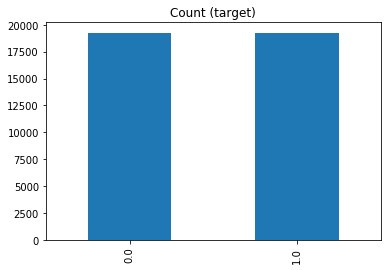

In [152]:

from imblearn.under_sampling import RandomUnderSampler


ru_sampler = RandomUnderSampler(replacement=False,sampling_strategy='majority',random_state=seed)
X_sm, y_sm = ru_sampler.fit_sample(X_train_pca, y_train)

y_sm_df = pd.DataFrame(y_sm, columns=["churned"]) 

target_count.plot(kind='bar', title='Count (target)');
target_count = y_sm_df.churned.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
plt.show()
plt.show()


In [153]:
# Model building
print("Current Time =",  datetime.now().strftime("%H:%M:%S"))
# instantiate an object of class SVC()
# note that we are using cost C=1
model = SVC(C = 1, kernel="linear")

# fit
model.fit(X_sm, y_sm)

# predict
y_pred = model.predict(X_test_pca)
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))
print("Current Time =",  datetime.now().strftime("%H:%M:%S"))
# print other metrics

print("Model evaluation on test data")

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))


Current Time = 22:28:33
[[6810 1467]
 [ 114  601]]
Current Time = 22:28:39
Model evaluation on test data
accuracy 0.8241770462633452
precision 0.29061895551257255
recall 0.8405594405594405


#### Checking the feasibility of SVC with RBF kernel

In [154]:
# Model building
print("Current Time =",  datetime.now().strftime("%H:%M:%S"))
# instantiate an object of class SVC()
# note that we are using cost C=1
model = SVC(C = 1, kernel="rbf")

# fit
model.fit(X_sm, y_sm)
print("Current Time =",  datetime.now().strftime("%H:%M:%S"))

# predict
y_pred = model.predict(X_test_pca)



confusion = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
# print other metrics
print("accuracy",metrics.accuracy_score(y_test, y_pred))
print(confusion)
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

specificity = TN / float(TN + FP)

print("specificity",specificity)

precision = TP / float(TP + FP)

print("F1 SCORE :",metrics.f1_score(y_test, y_pred))

print("Current Time =",  datetime.now().strftime("%H:%M:%S"))
# print other metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

Current Time = 22:28:39
Current Time = 22:28:40
accuracy 0.8460854092526691
[[7032 1245]
 [ 139  576]]
sensitivity 0.8055944055944056
specificity 0.849583182312432
F1 SCORE : 0.45425867507886436
Current Time = 22:28:43
accuracy 0.8460854092526691
precision 0.3163097199341021
recall 0.8055944055944056


### Now that we have seen running SVC for relatively small datasets is feasible, next step is to sample the provided dataset into expected size:
#### Scaling up the churned dataset by almost 3 times so that churned to non_churned ratio would be 25:75
##### This is done by SMOTE oversampling 
#### Undersampling the non_churned dataset to match with the number of churned dataset size, so the final ratio would be 1:1
##### Tried multiple Undersamplers and decided to proceed with RandomUnderSampler owing to its speed

Class 0: 6418
Class 1: 6418
Proportion: 1.0 : 1


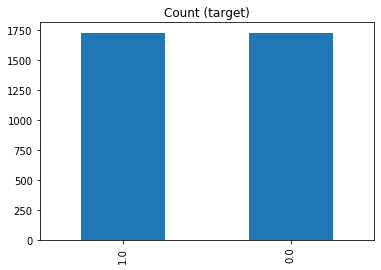

In [155]:
df_nb = masterdf.copy()
X = df_nb.loc[:, df_nb.columns != 'churned']
y = df_nb["churned"]

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=seed)



from sklearn.preprocessing import StandardScaler
sscaler = StandardScaler()
X_train_scaled = pd.DataFrame(sscaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled =  pd.DataFrame(sscaler.transform(X_test), columns = X_test.columns)


pca = PCA(0.95,random_state=seed)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
X_train_pca




from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

smote = SMOTE(sampling_strategy=0.33334,random_state=seed)
X_sm, y_sm = smote.fit_sample(X_train_pca, y_train)

ru_sampler = RandomUnderSampler(replacement=False,sampling_strategy='majority',random_state=seed)
X_sm, y_sm = ru_sampler.fit_sample(X_sm, y_sm)

y_sm_df = pd.DataFrame(y_sm, columns=["churned"]) 

target_count.plot(kind='bar', title='Count (target)');
target_count = y_sm_df.churned.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
plt.show()
plt.show()


In [156]:
# Model building
print("Current Time =",  datetime.now().strftime("%H:%M:%S"))
# instantiate an object of class SVC()
# note that we are using cost C=1
model = SVC(C = 1, kernel="rbf")

# fit
model.fit(X_sm, y_sm)

# predict
y_pred = model.predict(X_test_pca)
print("Current Time =",  datetime.now().strftime("%H:%M:%S"))



confusion = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)


print("accuracy",metrics.accuracy_score(y_test, y_pred))
print(confusion)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]
sensitivity = TP / float(FN + TP)

print("sensitivity",sensitivity)

specificity = TN / float(TN + FP)

print("specificity",specificity)

precision = TP / float(TP + FP)

print("F1 SCORE :",metrics.f1_score(y_test, y_pred))

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

Current Time = 22:28:45
Current Time = 22:29:03
accuracy 0.8669928825622776
[[7254 1023]
 [ 173  542]]
sensitivity 0.7580419580419581
specificity 0.8764044943820225
F1 SCORE : 0.47543859649122805
accuracy 0.8669928825622776
precision 0.3463258785942492
recall 0.7580419580419581


## As can be seen above, we have seen Best results among all the models tried until now for SVM with RBF kernel. Proceeding to tune the hyper parameters

In [157]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiating a model with cost=1
model = SVC(C = 1, kernel="rbf")
model

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### The below crossvalidation didn't show great improvement, hence documenting them but not including in python code file

#### computing the cross-validation scores 
print("Current Time =",  datetime.now().strftime("%H:%M:%S"))

cv_results_accuracy = cross_val_score(model, X_sm, y_sm, cv = folds, scoring = 'accuracy') 
cv_results_recall = cross_val_score(model, X_sm, y_sm, cv = folds, scoring = 'recall') 
cv_results_f1 = cross_val_score(model, X_sm, y_sm, cv = folds, scoring = 'f1') 
print("Current Time =",  datetime.now().strftime("%H:%M:%S"))


#### print 5 accuracies obtained from the 5 folds
print("cv_results_accuracy: ",cv_results_accuracy)
print("mean accuracy = {}".format(cv_results_accuracy.mean()))


#### print 5 accuracies obtained from the 5 folds
print("cv_results_recall: ",cv_results_recall)
print("mean recall = {}".format(cv_results_recall.mean()))


#### print 5 accuracies obtained from the 5 folds
print("cv_results_f1: ",cv_results_f1)
print("mean f1 = {}".format(cv_results_f1.mean()))

cv_results_accuracy:  [0.86020249 0.87495131 0.88585898 0.87027659 0.86638099]
mean accuracy = 0.87153407070571
cv_results_recall:  [0.85146942 0.85924207 0.88054883 0.8677686  0.87962963]
mean recall = 0.867731709449243
cv_results_f1:  [0.85657211 0.87377114 0.88161616 0.87400681 0.8692337 ]
mean f1 = 0.8710399847687565

In [158]:
# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000]}

model = SVC(kernel="rbf")

# scorings =  [ 'recall', 'accuracy','f1']
# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring="accuracy" , 
                        cv = folds, 
                        verbose = 1,
                       return_train_score=True)      
model_cv

GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True, scoring='accuracy',
             verbose=1)

<pre>
GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True, scoring='accuracy',
             verbose=1)
<pre/>

In [159]:
# fit the model - it will fit 5 folds across all values of C
print("Current Time =",  datetime.now().strftime("%H:%M:%S"))
model_cv.fit( X_sm, y_sm)
print("Current Time =",  datetime.now().strftime("%H:%M:%S"))


Current Time = 22:29:04
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  6.6min finished


Current Time = 22:35:59


In [160]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       9.467071      0.481958         1.588022        0.019542     0.1   
1       7.875139      0.190040         1.281612        0.014505       1   
2       8.093207      0.065573         1.108915        0.045846      10   
3      10.519515      0.131560         0.859574        0.024393     100   
4      15.617763      0.770128         0.703767        0.018945    1000   

        params  split0_test_score  split1_test_score  split2_test_score  \
0   {'C': 0.1}           0.828271           0.828204           0.841060   
1     {'C': 1}           0.860202           0.874951           0.885859   
2    {'C': 10}           0.901480           0.904168           0.912349   
3   {'C': 100}           0.916667           0.914686           0.928321   
4  {'C': 1000}           0.916667           0.913518           0.922478   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.828594  ...         0.830477        0.005355                5   
1           0.870277  ...         0.871534        0.008642                4   
2           0.901831  ...         0.903942        0.004421                3   
3           0.913128  ...         0.917965        0.005366                1   
4           0.898714  ...         0.912511        0.007871                2   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.839209            0.838641            0.833966   
1            0.894040            0.894440            0.888792   
2            0.945851            0.946538            0.942838   
3            0.983833            0.984127            0.982666   
4            0.997663            0.998345            0.998052   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.838056            0.838543          0.837683         0.001894  
1            0.896095            0.896582          0.893990         0.002770  
2            0.945370            0.946441          0.945407         0.001353  
3            0.984614            0.984030          0.983854         0.000647  
4            0.998345            0.998442          0.998169         0.000285  

[5 rows x 21 columns]

To get a better sense of how training and test accuracy varies with C, let's plot the tranining and test accuracies against C.

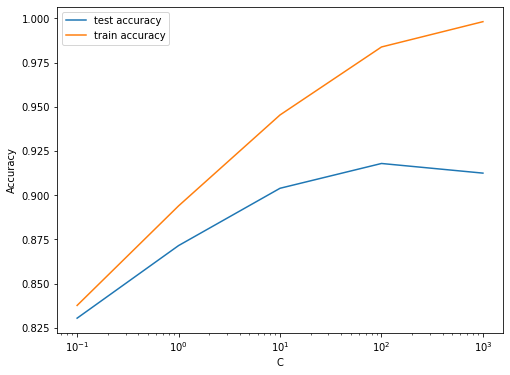

In [161]:
# plot of C versus train and test scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

Let's finally look at the optimal C values found by GridSearchCV.

In [162]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test accuracy is {0} at C = {1}".format(best_score, best_C))

 The highest test accuracy is 0.917965199324763 at C = 100


## Suspending the code for parameter tuning as obtaining results is highly time consuming and already performed. For the sake of evaluation, you are welcome to convert the following cell to code and run it. The average run time on our system was around 1 hour

# specify params
params = {"C": [0.1, 1, 10, 100, 1000]}

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)


model = SVC(kernel="rbf")

# specify scores/metrics in an iterable
scores = [  'recall', 'precision','f1']
print("Current Time =",  datetime.now().strftime("%H:%M:%S"))

for score in scores:
    print("# Tuning hyper-parameters for {}".format(score))
    
    # set up GridSearch for score metric
    clf = GridSearchCV(model, 
                       params, 
                       cv=folds,
                       scoring=score,
                       return_train_score=True)
    # fit
    clf.fit(X_train, y_train)

    print(" The highest {0} score is {1} at C = {2}".format(score, clf.best_score_, clf.best_params_))
    print("\n")
    print("Current Time =",  datetime.now().strftime("%H:%M:%S"))
    print("\n")


Current Time = 15:51:51
# Tuning hyper-parameters for recall
 The highest recall score is 0.4309927559867696 at C = {'C': 1000}


Current Time = 16:11:20


# Tuning hyper-parameters for precision
 The highest precision score is 0.7399610136452242 at C = {'C': 1}


Current Time = 16:30:43


# Tuning hyper-parameters for f1
 The highest f1 score is 0.479763399382526 at C = {'C': 100}


Current Time = 16:48:09

### Streamlining the SVC model building

In [163]:

    
def print_svm_stats(y_trues,y_preds):    
    confusion = metrics.confusion_matrix(y_true=y_trues, y_pred=y_preds)


    print(confusion)
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TP = confusion[1, 1]

    # accuracy
    print("accuracy",metrics.accuracy_score(y_trues, y_preds))
    
    sensitivity = TP / float(FN + TP)

    print("sensitivity",sensitivity)

    specificity = TN / float(TN + FP)

    print("specificity",specificity)

    precision = TP / float(TP + FP)

    print("F1 SCORE :",metrics.f1_score(y_trues, y_preds))

    # precision
    print("precision", metrics.precision_score(y_trues, y_preds))

    # recall/sensitivity
    print("recall", metrics.recall_score(y_trues, y_preds))
    
    
def perform_SVC(C_value, kernel_value, provide_test_metrics):
    df_nb = masterdf.copy()
    X = df_nb.loc[:, df_nb.columns != 'churned']
    y = df_nb["churned"]

    # Splitting the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=seed)



    from sklearn.preprocessing import StandardScaler
    sscaler = StandardScaler()
    X_train_scaled = pd.DataFrame(sscaler.fit_transform(X_train), columns = X_train.columns)
    X_test_scaled =  pd.DataFrame(sscaler.transform(X_test), columns = X_test.columns)


    pca = PCA(0.95,random_state=seed)

    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    




    from imblearn.over_sampling import SMOTE
    from imblearn.under_sampling import RandomUnderSampler

    smote = SMOTE(sampling_strategy=0.33334,random_state=seed)
    X_sm, y_sm = smote.fit_sample(X_train_pca, y_train)

    ru_sampler = RandomUnderSampler(replacement=False,sampling_strategy='majority',random_state=seed)
    X_sm, y_sm = ru_sampler.fit_sample(X_sm, y_sm)

    y_sm_df = pd.DataFrame(y_sm, columns=["churned"]) 

    model = SVC(C = C_value, kernel=kernel_value)

    # fit
    model.fit(X_sm, y_sm)

    
    y_train_pred = model.predict(X_sm)
    
    y_pred = model.predict(X_test_pca)
    
    print("============")
    print("Training stats:")
    print_svm_stats(y_sm,y_train_pred  )
 
    if provide_test_metrics:
        print("===") 
        print("Testing stats:")
        print_svm_stats(y_test,y_pred  )

    print("============")
    return model
    

## From the accuracy measures plotted previously, the maximum test accuracy is around 90% before the model starts to overfit the train data. Hence starting at best accuracy as given by the Grid Search at C=100 in the process of optimizing the Hyperparameter C

In [164]:
perform_SVC(100, "rbf", False)

Training stats:
[[6250  168]
 [  33 6385]]
accuracy 0.9843409161732627
sensitivity 0.9948582112807728
specificity 0.9738236210657526
F1 SCORE : 0.9845038933004394
precision 0.9743628872272242
recall 0.9948582112807728


SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Likely overfitting at C=100, checking for test data performance.
    Also, notice higher the C value, higher is the sensitivity, as noticed in GridSearch

In [165]:
perform_SVC(100, "rbf", True)

Training stats:
[[6250  168]
 [  33 6385]]
accuracy 0.9843409161732627
sensitivity 0.9948582112807728
specificity 0.9738236210657526
F1 SCORE : 0.9845038933004394
precision 0.9743628872272242
recall 0.9948582112807728
===
Testing stats:
[[7293  984]
 [ 262  453]]
accuracy 0.861432384341637
sensitivity 0.6335664335664336
specificity 0.8811163465023559
F1 SCORE : 0.4210037174721189
precision 0.31524008350730687
recall 0.6335664335664336


SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [166]:
perform_SVC(10, "rbf", True)

Training stats:
[[5975  443]
 [ 238 6180]]
accuracy 0.9469460891243378
sensitivity 0.9629167965098161
specificity 0.9309753817388594
F1 SCORE : 0.9477800782148609
precision 0.9331118828325532
recall 0.9629167965098161
===
Testing stats:
[[7309  968]
 [ 204  511]]
accuracy 0.869661921708185
sensitivity 0.7146853146853147
specificity 0.883049414038903
F1 SCORE : 0.4658158614402918
precision 0.34550371872887087
recall 0.7146853146853147


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Good enough score for accuracy and recall at C=10 but the train performance is still not on par with the model, expected overfitting, further reducing C

In [167]:
model = perform_SVC(1, "rbf", True)

Training stats:
[[5773  645]
 [ 683 5735]]
accuracy 0.8965409784979744
sensitivity 0.8935805546899346
specificity 0.8995014023060144
F1 SCORE : 0.8962337865291452
precision 0.8989028213166145
recall 0.8935805546899346
===
Testing stats:
[[7254 1023]
 [ 173  542]]
accuracy 0.8669928825622776
sensitivity 0.7580419580419581
specificity 0.8764044943820225
F1 SCORE : 0.47543859649122805
precision 0.3463258785942492
recall 0.7580419580419581


## Seeing less overfitting as test accuracy on par with train accuracy, finalizing the model at C=1, Support Vector Classifier with Kernel - rbf
    ============
    Training stats:
    [[5773  645]
     [ 683 5735]]
    accuracy 0.8965409784979744
    sensitivity 0.8935805546899346
    specificity 0.8995014023060144
    F1 SCORE : 0.8962337865291452
    precision 0.8989028213166145
    recall 0.8935805546899346
    ===
    Testing stats:
    [[7254 1023]
     [ 173  542]]
    accuracy 0.8669928825622776
    sensitivity 0.7580419580419581
    specificity 0.8764044943820225
    F1 SCORE : 0.47543859649122805
    precision 0.3463258785942492
    recall 0.7580419580419581
    ============



## Note: We have chosen to not balance the testing dataset anywhere the way we did for training dataset as we believe test data represents real time data and should not be tampered with.
### Incase the metrics of balanced testing dataset is expected, producing the same with the finalized SVM model for your reference

In [168]:
    
def perform_SVC_smoted_testdata(C_value, kernel_value):
    df_nb = masterdf.copy()
    X = df_nb.loc[:, df_nb.columns != 'churned']
    y = df_nb["churned"]

    # Splitting the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=seed)



    from sklearn.preprocessing import StandardScaler
    sscaler = StandardScaler()
    X_train_scaled = pd.DataFrame(sscaler.fit_transform(X_train), columns = X_train.columns)
    X_test_scaled =  pd.DataFrame(sscaler.transform(X_test), columns = X_test.columns)


    pca = PCA(0.95,random_state=seed)

    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    

    from imblearn.over_sampling import SMOTE
    from imblearn.under_sampling import RandomUnderSampler

    smote = SMOTE(sampling_strategy=0.33334,random_state=seed)
    X_sm, y_sm = smote.fit_sample(X_train_pca, y_train)
    smote = SMOTE(sampling_strategy="minority",random_state=seed)
    X_test_sm, y_test_sm = smote.fit_sample(X_test_pca, y_test)

    ru_sampler = RandomUnderSampler(replacement=False,sampling_strategy='majority',random_state=seed)
    X_sm, y_sm = ru_sampler.fit_sample(X_sm, y_sm)

    y_test_sm_df = pd.DataFrame(y_test_sm, columns=["churned"]) 

    target_count = y_test_sm_df.churned.value_counts()
    print('Class 0:', target_count[0])
    print('Class 1:', target_count[1])
    print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
    target_count.plot(kind='bar', title='Count (target)');
    plt.show()
    plt.show()


    model = SVC(C = C_value, kernel=kernel_value)

    # fit
    model.fit(X_sm, y_sm)

    
    y_train_pred = model.predict(X_sm)
    
    y_pred = model.predict(X_test_sm)
    
    print("============")
    print("Training stats:")
    print_svm_stats(y_sm,y_train_pred  )
    print("===")
    
    print("Testing stats:")
    print_svm_stats(y_test_sm,y_pred  )
    
    print("============")
    return model
    

Class 0: 8277
Class 1: 8277
Proportion: 1.0 : 1


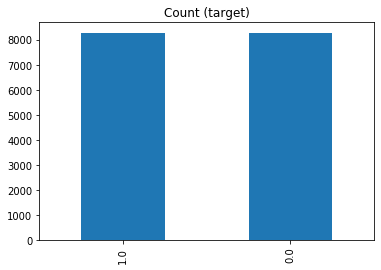

Training stats:
[[5773  645]
 [ 683 5735]]
accuracy 0.8965409784979744
sensitivity 0.8935805546899346
specificity 0.8995014023060144
F1 SCORE : 0.8962337865291452
precision 0.8989028213166145
recall 0.8935805546899346
===
Testing stats:
[[7254 1023]
 [1383 6894]]
accuracy 0.8546574845958681
sensitivity 0.8329104748097137
specificity 0.8764044943820225
F1 SCORE : 0.8514264542423121
precision 0.8707843880257673
recall 0.8329104748097137


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [169]:
perform_SVC_smoted_testdata(1, "rbf")



## Note: The above metric is the best case scenario that can happen when the test data is perfectly balanced. However, these metrics are only for reference and do not reflect model's actual evaluation on provided test data.

# Summary of multiple models on Test data:
## Logistic model :
    [[7863  414]
     [ 342  373]]
    accuracy score:  0.9159252669039146
    F1 SCORE : 0.4966711051930759
    Sensitivity:  0.5216783216783217
    Specificity:  0.9499818774918448
    False positive rate:  0.05001812250815513
    Precision or Positive predictive value:  0.47395171537484115
    Negative predictive value:  0.9583180987202925
## Naive Bayes - Bernoulli Classifier:
    accuracy 0.7640124555160143
    [[6357 1920]
     [ 202  513]]
    sensitivity 0.7174825174825175
    specificity 0.768031895614353
    PRECISION SCORE : 0.21085080147965474
    RECALL SCORE : 0.7174825174825175
    F1 SCORE : 0.32592121982210925
## SVM - C=1 - RBF Kernel:
    Testing stats:
    [[7254 1023]
     [ 173  542]]
    accuracy 0.8669928825622776
    sensitivity 0.7580419580419581
    specificity 0.8764044943820225
    F1 SCORE : 0.47543859649122805
    precision 0.3463258785942492
    recall 0.7580419580419581
    

## Proceeding with models to explain business drivers

In [170]:
masterdf.isnull().sum().sum()

0

In [171]:
df = masterdf.copy()
X = df.loc[:, df.columns != 'churned']
y = df["churned"]


In [172]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=seed)

In [173]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority',random_state=seed)
X_sm, y_sm = smote.fit_sample(X_train, y_train)
X_sm.head()
y_sm.head()

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: churned, dtype: float64

In [174]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sm_scaled = pd.DataFrame(scaler.fit_transform(X_sm), columns = X_sm.columns)
X_test=pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [175]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5,random_state=seed)
dt_default.fit(X_train_sm_scaled, y_sm)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [176]:
# Let's check the evaluation metrics of our default model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions

y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93      8277
         1.0       0.36      0.68      0.47       715

    accuracy                           0.88      8992
   macro avg       0.66      0.78      0.70      8992
weighted avg       0.92      0.88      0.89      8992



In [177]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(X_train_sm_scaled.columns)
features

['jun_vbc_3g',
 'av_rech_amt_data_8',
 'sachet_3g_8',
 'last_day_rch_amt_6',
 'std_og_t2m_mou_6',
 'sachet_2g_6',
 'circle_id',
 'loc_og_mou_7',
 'og_others_7',
 'max_rech_amt_6',
 'loc_ic_t2o_mou',
 'sachet_2g_8',
 'total_og_mou_8',
 'sachet_3g_6',
 'onnet_mou_8',
 'std_og_t2t_mou_6',
 'loc_og_t2c_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2c_mou_7',
 'loc_ic_t2t_mou_7',
 'last_day_rch_amt_8',
 'std_og_t2c_mou_8',
 'isd_og_mou_7',
 'max_rech_amt_7',
 'vol_3g_mb_8',
 'arpu_7',
 'std_ic_t2t_mou_8',
 'total_rech_num_6',
 'total_ic_mou_7',
 'max_rech_amt_8',
 'monthly_3g_7',
 'std_ic_t2o_mou_7',
 'total_ic_mou_6',
 'sep_vbc_3g',
 'std_og_t2f_mou_7',
 'monthly_2g_7',
 'night_pck_user_8',
 'std_ic_t2t_mou_6',
 'std_og_t2m_mou_8',
 'roam_ic_mou_8',
 'total_og_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_6',
 'std_ic_t2f_mou_8',
 'monthly_3g_6',
 'fb_user_6',
 'loc_og_t2t_mou_7',
 'roam_ic_mou_7',
 'std_og_t2t_mou_8',
 'av_rech_amt_data_7',
 'loc_og_t2c_mou_8',
 'total_rech_amt_7',
 'sachet_3g_7

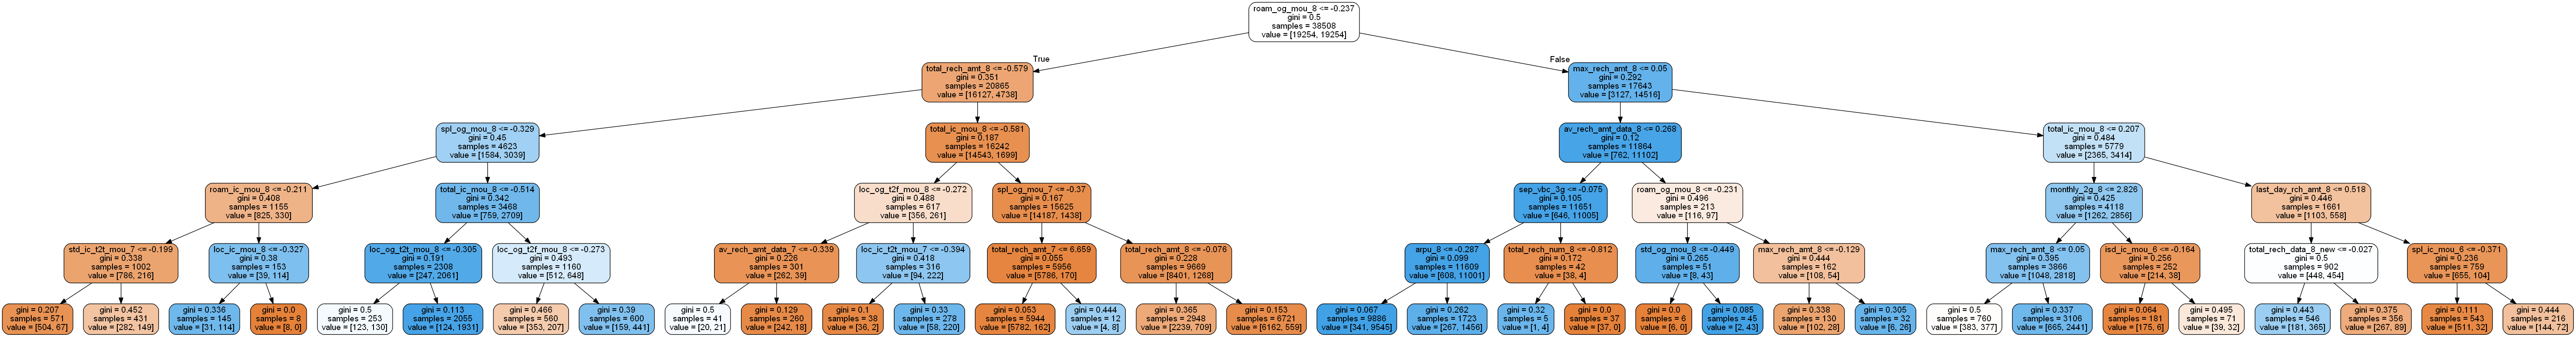

In [178]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [179]:
 # plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("telecom_churn1.pdf")

True

# Hyperparameter Tunning is commented as it takes heavy computing power and time. It can be run by uncommenting it.

### Tuning max_depth

### GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


### specify number of folds for k-fold CV
n_folds = 5

### parameters to build the model on
parameters = {'max_depth': range(1, 15)}

### instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

### fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train_sm_scaled, y_sm)

### scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

### Now let's visualize how train and test score changes with max_depth.

### plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

You can see that as we increase the value of max_depth, both training and test score increase till about max-depth = 7 or 8, after which the test score will not be on par with training score. Note that the scores are average accuracies across the 5-folds.

Thus, it is clear that the model is overfitting the training data if the max_depth is too high. Next, let's see how the model behaves with other hyperparameters.

### Tuning min_samples_leaf
The hyperparameter min_samples_leaf indicates the minimum number of samples required to be at a leaf.

So if the values of min_samples_leaf is less, say 5, then the will be constructed even if a leaf has 5, 6 etc. observations (and is likely to overfit).

Let's see what will be the optimum value for min_samples_leaf.

### GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


### specify number of folds for k-fold CV
n_folds = 5

### parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

### instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)
print("Current Time =",  datetime.now().strftime("%H:%M:%S"))

### fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train_sm_scaled, y_sm)
print("Current Time =",  datetime.now().strftime("%H:%M:%S"))


### scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

### plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

You can see that at low values of min_samples_leaf, the tree gets a bit overfitted. At values > 100, however, the model becomes more stable and the training and test accuracy start to converge.

### Tuning min_samples_split
The hyperparameter min_samples_split is the minimum no. of samples required to split an internal node. Its default value is 2, which means that even if a node is having 2 samples it can be furthur divided into leaf nodes.

### GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


### specify number of folds for k-fold CV
n_folds = 5

### parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

### instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

print("Current Time =",  datetime.now().strftime("%H:%M:%S"))

### fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train_sm_scaled, y_sm)
print("Current Time =",  datetime.now().strftime("%H:%M:%S"))


### scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

### plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

This shows that as you increase the min_samples_split, the tree overfits lesser since the model is less complex.

### Grid Search to Find Optimal Hyperparameters
We can now use GridSearchCV to find multiple optimal hyperparameters together. Note that this time, we'll also specify the criterion (gini/entropy or IG).

### Create the parameter grid 
param_grid = {
    'max_depth': range(5, 9, 1),
    'min_samples_leaf': range(50, 101, 50),
    'min_samples_split': range(125, 151, 25),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

### Instantiate the grid search model
dtree = DecisionTreeClassifier()
print("Current Time =",  datetime.now().strftime("%H:%M:%S"))

grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)
grid_search.fit(X_train_sm_scaled, y_sm)
print("Current Time =",  datetime.now().strftime("%H:%M:%S"))


### cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

### printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

# Best hyper parameters for decision tree
<pre>
Tree hyperparameters deduced from Grid search:
max_depth=8,
min_samples_leaf=50,
min_samples_split=125

best accuracy 0.8964634795192469
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=125,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
<pre/>                       

#### Running the model with best parameters obtained from grid search.

In [180]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = seed,
                                  max_depth=8, 
                                  min_samples_leaf=50,
                                  min_samples_split=125)
clf_gini.fit(X_train_sm_scaled, y_sm)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=125,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [181]:
# accuracy score
clf_gini.score(X_test,y_test)

0.8835631672597865

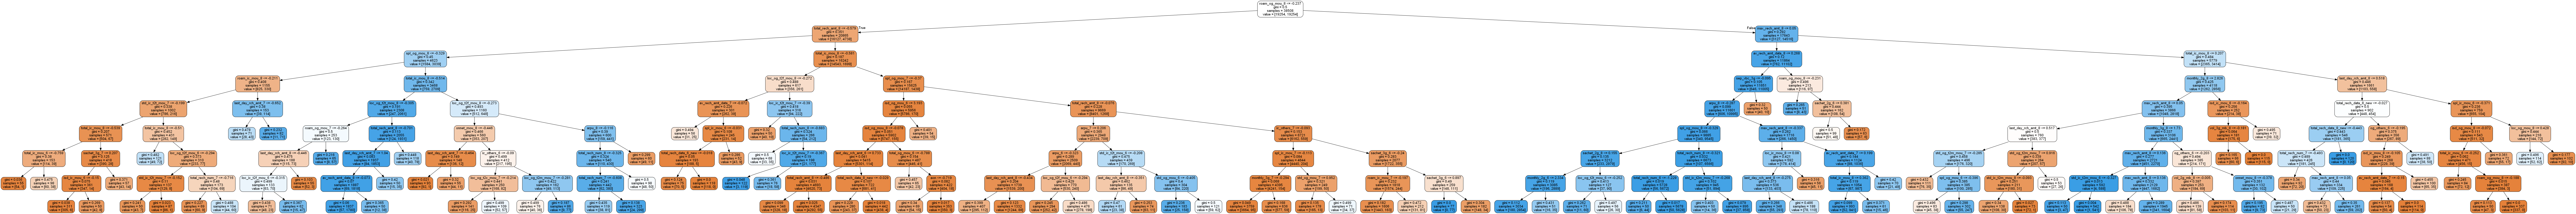

In [182]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [183]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=125)
clf_gini.fit(X_train_sm_scaled, y_sm)

# score
print(clf_gini.score(X_test,y_test))

0.8781138790035588


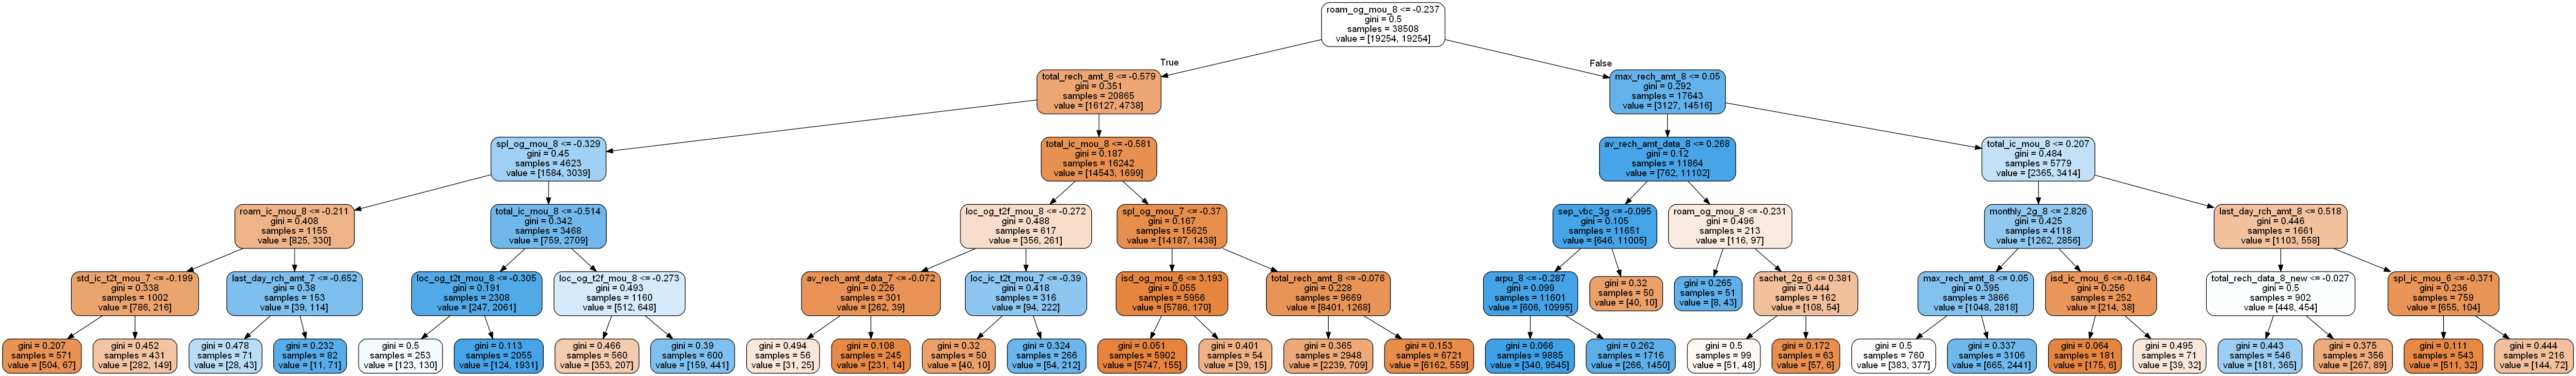

In [184]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [185]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.90      0.93      8277
         1.0       0.36      0.67      0.47       715

    accuracy                           0.88      8992
   macro avg       0.66      0.78      0.70      8992
weighted avg       0.92      0.88      0.89      8992



In [186]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[7414  863]
 [ 233  482]]


In [187]:
# tree with max_depth = 3 for easier understanding
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=125)
clf_gini.fit(X_train_sm_scaled, y_sm)

# score
print(clf_gini.score(X_test,y_test))

# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test,y_pred))

0.8498665480427047
              precision    recall  f1-score   support

         0.0       0.97      0.86      0.91      8277
         1.0       0.31      0.73      0.44       715

    accuracy                           0.85      8992
   macro avg       0.64      0.80      0.68      8992
weighted avg       0.92      0.85      0.88      8992

[[7118 1159]
 [ 191  524]]


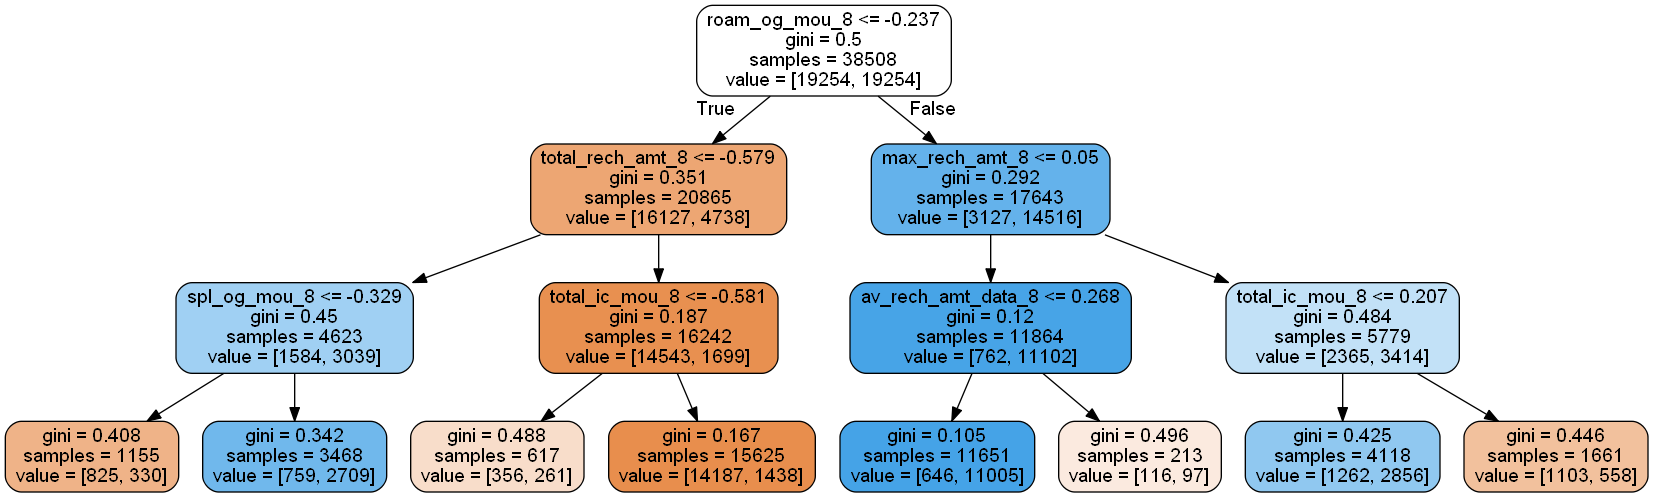

In [188]:
Image(graph.create_png())

# Recommendations


### We can conclude from the Decision Tree that the features that belong to month 8 i.e.,  the action month. Hence, it is clear that what happens in the action phase has a direct impact on the customer churn of high value customers. Specifically, these features are as follows:

    roam_og_mou_8 -outgoing roaming calls minutes of usage in month 8
    total_rech_amt_8 - total recharge amount in month 8
    max_rech_amt_8 -maximum recharge amount in month 8
    spl_og_mou_8 -Special outgoing call for the month of 8
    total_ic_mou_8 -Total incoming minutes of usage in month 8
    av_rech_amt_data_8 - average recharge amount for mobile data in month 8
### Local calls Mou's be it incoming or outgoing have a very important role for churn predictions. 
    Reduction in these KPI's forms a clear indicator of churn.
#### Overall, drop in any of these indicator KPI is a signal that the customer is not actively engaging in the services offered by the Network operator and thus may choose to churn in the near future.


## Next, we will look at some of the stratergic steps which can be taken to retain these predicted churners.
#### Strategies to manage customer churn
    - It is a fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
    - For many incumbent operators, retaining high profitable customers is the number one business goal.
    - Monitoring Drop in usage
    - Customer churn seems to be well predicted by drop in usage.
    - Aside from using the Machine Learning model for predicting churn, the telecom company should pay close attention to drop in MoU,and data usage (2g and 3g) month over month. If possible, the company should track these numbers week over week. 
    - Since billing cycles are typically monthly, a drop in usage numbers will give the company time to react when tracked at weekly level.
    - Contact these customers proactively to find out what's affecting their experience. Perhaps, offer them coupons or other incentives to continue to use the services, while the company fixes the issues reported.



## Improving Outgoing services¶:
    - Initially, churner's outgoing usage was more than that of non-churners. Gradually they dropped there outgoing usage. May be these customers din't like the outgoing services offered to them or may be the call tariffs seemed expensive to them or may be the overall call quality, network coverage was not liked my them. This could be further investigated by the network service provider.
#### Strategy suggestions:
    - The Network operators must futher investigate their outgoing tariffs, plans and campaigns.
    - Might be that the outgoing tariffs offered to it's customer are less competitive to the outgoing tariffs of their competitor.
    - New campaigns which targets the customers with high outgoing usage be rolled out



## Improving Roaming services:
#### Strategy suggestions:
    - Churners show higher roaming usage than non-churners.
    - The Network operators must futher investigate their roaming tariffs, and quality of service. Might be that the roaming tariffs offered are less competitive than their competitor.
    - It might be that the customer is not getting good quality of service while roaming. In this case, quality of service guarantees with roaming partners and network quality need to be investigated.
    - New campaigns which targets the roaming customers can be rolled out. Like, 
    - Discounted roaming rates during particular hours of the day.
    - Free monthly roaming mou's depending on the users past roaming mou usage.

